In [1]:
import sys
sys.path.append('../')
# print (sys.path)
import torch
import logging
import unittest
import traceback
import numpy as np

from castle.algorithms import *
from castle.common import consts
from castle.common import GraphDAG
from castle.metrics import MetricsDAG

from utils.functional import combined_params

2023-03-30 14:44:23,671 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/backend/__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2023-03-30 14:44:23,869 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


## load data & params

In [2]:
data = np.load('dataset/linear_gauss_6nodes_15edges.npz', allow_pickle=True)
x = data['x']
true_dag = data['y']
rank = np.linalg.matrix_rank(true_dag)
error_params = []

In [6]:
x.shape

(2000, 6)

In [5]:
true_dag

array([[0, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]], dtype=int32)

In [3]:
def add_params(params=None) -> dict:
    """
    add parameter `device_type` for algorithms based on torch

    Parameters
    ----------
    params: dict
        from castle.common.consts
    """

    if params is None:
        params = dict()
    if torch.cuda.is_available():
        params['device_type'] = ['cpu', 'gpu']
    else:
        params['device_type'] = ['cpu']

    return params

## test

In [4]:
results = []

In [21]:
anm = ANMNonlinear(alpha=0.05)
anm.learn(data=x)

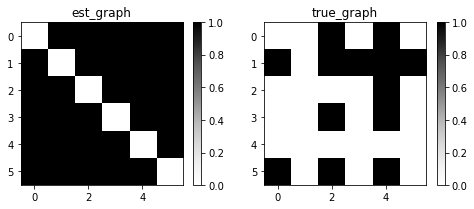

{'fdr': 0.1333, 'tpr': 1.0, 'fpr': 1.0, 'shd': 2, 'nnz': 15, 'precision': 0.4333, 'recall': 1.0, 'F1': 0.6047, 'gscore': 0.0}


In [22]:
GraphDAG(anm.causal_matrix, true_dag)
mm = MetricsDAG(anm.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm.metrics)

In [ ]:
p_corl = add_params(consts.CORL_VALID_PARAMS)

In [ ]:
for d in combined_params(p_corl):
    try:
        algo = CORL(**d, iteration=3)
        algo.learn(data=x)
    except Exception:
        error_params.append(d)
        print(traceback.format_exc())

In [ ]:
# plot est_dag and true_dag
GraphDAG(algo.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(algo.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm.metrics)

In [ ]:
for d in combined_params(consts.DIRECT_LINGAM_VALID_PARAMS):
    print(d)
    print(f"{'=' * 50}")
    try:
        DLG = DirectLiNGAM(**d)
        DLG.learn(data=x)
    except Exception:
        error_params.append(d)
        print(traceback.format_exc())

In [ ]:
# plot est_dag and true_dag
GraphDAG(DLG.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(DLG.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm.metrics)

In [ ]:
d = {'criterion': 'bic', 'method': 'scatter'}
print(d)
print(f"{'=' * 100}")
try:
    GES_1 = GES(**d)
    GES_1.learn(data=x)
except Exception:
    error_params.append(d)
    print(traceback.format_exc())

In [ ]:
# plot est_dag and true_dag
GraphDAG(GES_1.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(GES_1.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm)

In [ ]:
d = {'criterion': 'bic', 'method': 'r2'}
print(d)
print(f"{'=' * 100}")
try:
    GES_2 = GES(**d)
    GES_2.learn(data=x)
except Exception:
    error_params.append(d)
    print(traceback.format_exc())

In [ ]:
# plot est_dag and true_dag
GraphDAG(GES_2.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(GES_2.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm)

In [ ]:
d = {'criterion': 'bdeu'}
print(d)
print(f"{'=' * 100}")
try:
    GES_3 = GES(**d)
    GES_3.learn(data=x)
except Exception:
    error_params.append(d)
    print(traceback.format_exc())

In [ ]:
# plot est_dag and true_dag
GraphDAG(GES_3.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(GES_3.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm)

In [5]:
g = GOLEM(num_iter=1e4)
g.learn(data=x)

2023-03-16 20:31:33,507 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/golem.py[line:122] - INFO: GPU is unavailable.
2023-03-16 20:31:33,512 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/golem.py[line:207] - INFO: Started training for 10000 iterations.
2023-03-16 20:31:33,650 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/golem.py[line:220] - INFO: [Iter 0] score=36.402, likelihood=36.402, h=0.0e+00
2023-03-16 20:31:37,465 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/golem.py[line:220] - INFO: [Iter 5000] score=28.501, likelihood=28.172, h=2.5e-04
2023-03-16 20:31:41,226 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/golem.py[line:220] - INFO: [Iter 10000] score=28.500, likelihood=28.171, h=2.7e-04


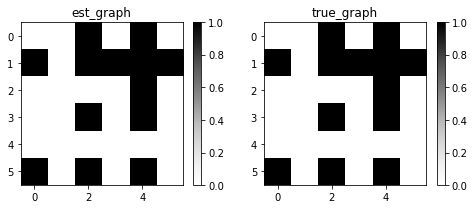

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 13, 'precision': 1.0, 'recall': 1.0, 'F1': 1.0, 'gscore': 1.0}


In [6]:
# plot est_dag and true_dag
GraphDAG(g.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(g.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm)

2023-03-16 19:05:59,101 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'model_name': 'NonLinGaussANM', 'nonlinear': 'leaky-relu', 'optimizer': 'rmsprop', 'norm_prod': 'paths', 'device_type': 'cpu'}


Training Iterations: 100%|██████████| 3/3 [00:00<00:00, 199.64it/s]


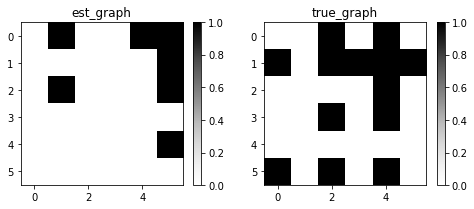

2023-03-16 19:05:59,293 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.7143, 'tpr': 0.1538, 'fpr': 2.5, 'shd': 11, 'nnz': 7, 'precision': 0.2857, 'recall': 0.1538, 'F1': 0.2, 'gscore': 0.0}
{'model_name': 'NonLinGaussANM', 'nonlinear': 'leaky-relu', 'optimizer': 'rmsprop', 'norm_prod': 'none', 'device_type': 'cpu'}


Training Iterations: 100%|██████████| 3/3 [00:00<00:00, 120.47it/s]


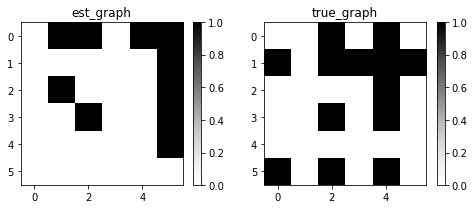

2023-03-16 19:05:59,519 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.6, 'tpr': 0.3077, 'fpr': 3.0, 'shd': 10, 'nnz': 10, 'precision': 0.4, 'recall': 0.3077, 'F1': 0.3478, 'gscore': 0.0}
{'model_name': 'NonLinGaussANM', 'nonlinear': 'leaky-relu', 'optimizer': 'sgd', 'norm_prod': 'paths', 'device_type': 'cpu'}


Training Iterations: 100%|██████████| 3/3 [00:00<00:00, 236.70it/s]


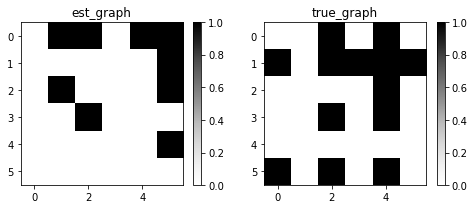

2023-03-16 19:05:59,694 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.5556, 'tpr': 0.3077, 'fpr': 2.5, 'shd': 9, 'nnz': 9, 'precision': 0.4444, 'recall': 0.3077, 'F1': 0.3636, 'gscore': 0.0}
{'model_name': 'NonLinGaussANM', 'nonlinear': 'leaky-relu', 'optimizer': 'sgd', 'norm_prod': 'none', 'device_type': 'cpu'}


Training Iterations:   0%|          | 0/3 [00:00<?, ?it/s]/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py:422: RuntimeWarning: overflow encountered in cast
  w_adjs[iter, :, :] = w_adj.detach().cpu().numpy().astype(np.float32)
Training Iterations:  33%|███▎      | 1/3 [00:00<00:00, 107.68it/s]
2023-03-16 19:05:59,711 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/1211915091.py", line 7, in <module>
    grandag.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 343, in learn
    self._to_dag(train_data)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 511, in _to_dag
    A = compute_jacobian_avg(self.model, train_data,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/dag_optimizer.py", line 93, in compute_jacobian_avg
    log_probs = model.compute_log_likelihood(x, weights, biases, extra_params,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 270, in compute_log_likelihood
    conditional = self.get_distribution(density_param)
  Fi

Training Iterations: 100%|██████████| 3/3 [00:00<00:00, 222.70it/s]


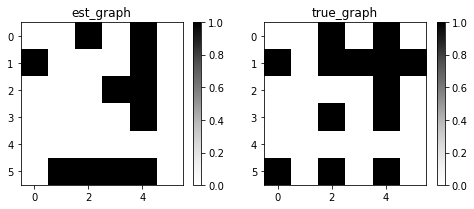

2023-03-16 19:05:59,944 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.7273, 'recall': 0.6154, 'F1': 0.6667, 'gscore': 0.3846}
{'model_name': 'NonLinGaussANM', 'nonlinear': 'sigmoid', 'optimizer': 'rmsprop', 'norm_prod': 'none', 'device_type': 'cpu'}


Training Iterations: 100%|██████████| 3/3 [00:00<00:00, 218.42it/s]


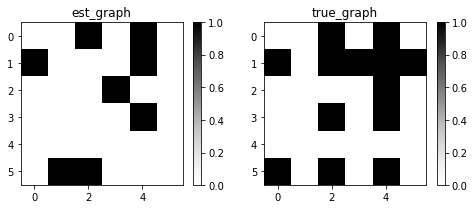

2023-03-16 19:06:00,119 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.25, 'tpr': 0.4615, 'fpr': 1.0, 'shd': 7, 'nnz': 8, 'precision': 0.75, 'recall': 0.4615, 'F1': 0.5714, 'gscore': 0.3077}
{'model_name': 'NonLinGaussANM', 'nonlinear': 'sigmoid', 'optimizer': 'sgd', 'norm_prod': 'paths', 'device_type': 'cpu'}


Training Iterations: 100%|██████████| 3/3 [00:00<00:00, 246.93it/s]


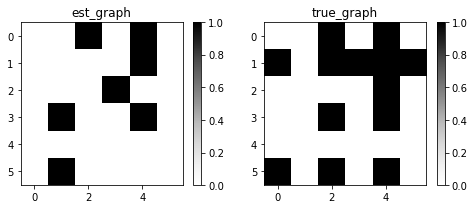

2023-03-16 19:06:00,305 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.4286, 'tpr': 0.3077, 'fpr': 1.5, 'shd': 9, 'nnz': 7, 'precision': 0.5714, 'recall': 0.3077, 'F1': 0.4, 'gscore': 0.0769}
{'model_name': 'NonLinGaussANM', 'nonlinear': 'sigmoid', 'optimizer': 'sgd', 'norm_prod': 'none', 'device_type': 'cpu'}


Training Iterations:  33%|███▎      | 1/3 [00:00<00:00, 112.02it/s]


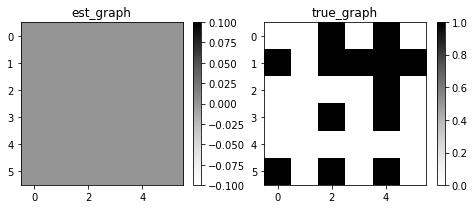

/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/metrics/evaluation.py:224: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/TP_FP
2023-03-16 19:06:00,493 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.0, 'tpr': 0.0, 'fpr': 0.0, 'shd': 13, 'nnz': 0, 'precision': nan, 'recall': 0.0, 'F1': nan, 'gscore': 0.0}
{'model_name': 'NonLinGauss', 'nonlinear': 'leaky-relu', 'optimizer': 'rmsprop', 'norm_prod': 'paths', 'device_type': 'cpu'}


Training Iterations: 100%|██████████| 3/3 [00:00<00:00, 240.83it/s]


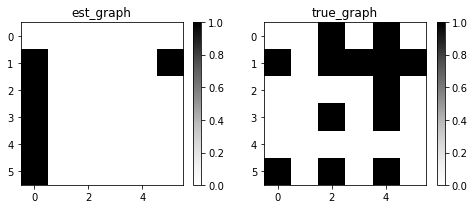

2023-03-16 19:06:00,676 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.5, 'tpr': 0.2308, 'fpr': 1.5, 'shd': 11, 'nnz': 6, 'precision': 0.5, 'recall': 0.2308, 'F1': 0.3158, 'gscore': 0.0}
{'model_name': 'NonLinGauss', 'nonlinear': 'leaky-relu', 'optimizer': 'rmsprop', 'norm_prod': 'none', 'device_type': 'cpu'}


Training Iterations:   0%|          | 0/3 [00:00<?, ?it/s]
2023-03-16 19:06:00,686 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/1211915091.py", line 7, in <module>
    grandag.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 340, in learn
    self._train(train_data=train_data, test_data=test_data)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 440, in _train
    loss_val = - torch.mean(self.model.compute_log_likelihood(x,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 270, in compute_log_likelihood
    conditional = self.get_distribution(density_param)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 319, in get_distribution
    return distributions.normal.Normal(dp[0], t

Training Iterations:  33%|███▎      | 1/3 [00:00<00:00, 99.17it/s]
2023-03-16 19:06:00,704 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/1211915091.py", line 7, in <module>
    grandag.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 343, in learn
    self._to_dag(train_data)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 511, in _to_dag
    A = compute_jacobian_avg(self.model, train_data,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/dag_optimizer.py", line 93, in compute_jacobian_avg
    log_probs = model.compute_log_likelihood(x, weights, biases, extra_params,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 270, in compute_log_likelihood
    conditional = self.get_distribution(density_param)
  Fi

Training Iterations:   0%|          | 0/3 [00:00<?, ?it/s]
2023-03-16 19:06:00,715 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/1211915091.py", line 7, in <module>
    grandag.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 340, in learn
    self._train(train_data=train_data, test_data=test_data)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 440, in _train
    loss_val = - torch.mean(self.model.compute_log_likelihood(x,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 270, in compute_log_likelihood
    conditional = self.get_distribution(density_param)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 319, in get_distribution
    return distributions.normal.Normal(dp[0], t

Training Iterations: 100%|██████████| 3/3 [00:00<00:00, 210.87it/s]


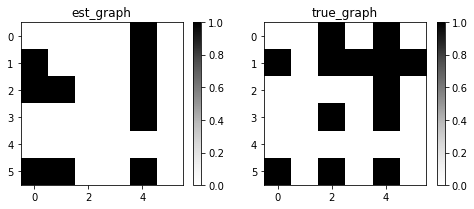

2023-03-16 19:06:00,901 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 6, 'nnz': 10, 'precision': 0.7, 'recall': 0.5385, 'F1': 0.6087, 'gscore': 0.3077}
{'model_name': 'NonLinGauss', 'nonlinear': 'sigmoid', 'optimizer': 'rmsprop', 'norm_prod': 'none', 'device_type': 'cpu'}


Training Iterations:   0%|          | 0/3 [00:00<?, ?it/s]
2023-03-16 19:06:00,912 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/1211915091.py", line 7, in <module>
    grandag.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 340, in learn
    self._train(train_data=train_data, test_data=test_data)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 440, in _train
    loss_val = - torch.mean(self.model.compute_log_likelihood(x,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 270, in compute_log_likelihood
    conditional = self.get_distribution(density_param)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 319, in get_distribution
    return distributions.normal.Normal(dp[0], t

Training Iterations: 100%|██████████| 3/3 [00:00<00:00, 221.91it/s]


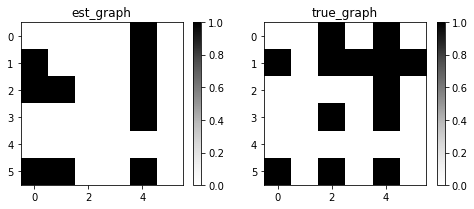

2023-03-16 19:06:01,155 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py[line:271] - INFO: GPU is unavailable.


{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 6, 'nnz': 10, 'precision': 0.7, 'recall': 0.5385, 'F1': 0.6087, 'gscore': 0.3077}
{'model_name': 'NonLinGauss', 'nonlinear': 'sigmoid', 'optimizer': 'sgd', 'norm_prod': 'none', 'device_type': 'cpu'}


Training Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/1211915091.py", line 7, in <module>
    grandag.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 340, in learn
    self._train(train_data=train_data, test_data=test_data)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/gran_dag.py", line 440, in _train
    loss_val = - torch.mean(self.model.compute_log_likelihood(x,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 270, in compute_log_likelihood
    conditional = self.get_distribution(density_param)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/gran_dag/torch/base/base_model.py", line 319, in get_distribution
    return distributions.normal.Normal(dp[0], t

In [11]:
params = add_params(consts.GRANDAG_VALID_PARAMS)
for d in combined_params(params):
    print(d)
    print(f"{'=' * 100}")
    try:
        grandag = GraNDAG(**d, input_dim=x.shape[1], iterations=3)
        grandag.learn(data=x)
        
        GraphDAG(grandag.causal_matrix, true_dag)

        # calculate accuracy
        mm = MetricsDAG(grandag.causal_matrix, true_dag)
        print(mm.metrics)
        results.append(mm)

    except Exception:
        error_params.append(d)
        print(traceback.format_exc())

In [ ]:
# plot est_dag and true_dag
GraphDAG(grandag.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(grandag.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm)

In [6]:
params = add_params(consts.GNN_VALID_PARAMS)
for d in combined_params(params):
    print(f"\n{'=' * 100}")
    print(d)
    print(f"{'=' * 100}")
    try:
        daggnn = DAG_GNN(**d, epochs=5, k_max_iter=5)
        daggnn.learn(data=x)
    except Exception:
        error_params.append(d)
        print(traceback.format_exc())

2023-03-16 18:58:30,563 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:167] - INFO: GPU is unavailable.



{'encoder_type': 'mlp', 'decoder_type': 'mlp', 'optimizer': 'adam', 'device_type': 'cpu'}


2023-03-16 18:58:30,813 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 0, epoch: 4, h_new: 0.21841247701845923
2023-03-16 18:58:31,241 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 1, epoch: 4, h_new: 0.039674027372072374
2023-03-16 18:58:31,646 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 2, epoch: 4, h_new: 0.006694290134444003
2023-03-16 18:58:32,045 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 3, epoch: 4, h_new: 0.0012010990192354853
2023-03-16 18:58:32,446 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 4, epoch: 4, h_new: 0.0002135757316574782


{'encoder_type': 'mlp', 'decoder_type': 'mlp', 'optimizer': 'sgd', 'device_type': 'cpu'}
Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/3911726809.py", line 8, in <module>
    algo.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py", line 235, in learn
    elbo_loss, origin_a = self._train(train_loader=train_loader,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py", line 316, in _train
    raise ValueError(f"The loss value is Nan, "
ValueError: The loss value is Nan, suggest to set optimizer='adam' to solve it. If you already set, please check your code whether has other problems.


{'encoder_type': 'mlp', 'decoder_type': 'sem', 'optimizer': 'adam', 'device_type': 'cpu'}


2023-03-16 18:58:33,124 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 1, epoch: 4, h_new: 0.0589254465111253
2023-03-16 18:58:33,470 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 2, epoch: 4, h_new: 0.012397061624771055
2023-03-16 18:58:33,809 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 3, epoch: 4, h_new: 0.0022687060379809054
2023-03-16 18:58:33,971 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 4, epoch: 4, h_new: 0.0022687060379809054
2023-03-16 18:58:33,971 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:167] - INFO: GPU is unavailable.
2023-03-16 18:58:33,980 - /


{'encoder_type': 'mlp', 'decoder_type': 'sem', 'optimizer': 'sgd', 'device_type': 'cpu'}
Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/3911726809.py", line 8, in <module>
    algo.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py", line 235, in learn
    elbo_loss, origin_a = self._train(train_loader=train_loader,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py", line 316, in _train
    raise ValueError(f"The loss value is Nan, "
ValueError: The loss value is Nan, suggest to set optimizer='adam' to solve it. If you already set, please check your code whether has other problems.


{'encoder_type': 'sem', 'decoder_type': 'mlp', 'optimizer': 'adam', 'device_type': 'cpu'}


2023-03-16 18:58:34,342 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 1, epoch: 4, h_new: 1.0
2023-03-16 18:58:35,028 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 2, epoch: 4, h_new: 0.1222341937804714
2023-03-16 18:58:35,537 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 3, epoch: 4, h_new: 0.04252984111671321
2023-03-16 18:58:35,711 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 4, epoch: 4, h_new: 0.04252984111671321
2023-03-16 18:58:35,712 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:167] - INFO: GPU is unavailable.
2023-03-16 18:58:35,719 - /Users/momo/Desktop/Co


{'encoder_type': 'sem', 'decoder_type': 'mlp', 'optimizer': 'sgd', 'device_type': 'cpu'}
Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/3911726809.py", line 8, in <module>
    algo.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py", line 235, in learn
    elbo_loss, origin_a = self._train(train_loader=train_loader,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py", line 316, in _train
    raise ValueError(f"The loss value is Nan, "
ValueError: The loss value is Nan, suggest to set optimizer='adam' to solve it. If you already set, please check your code whether has other problems.


{'encoder_type': 'sem', 'decoder_type': 'sem', 'optimizer': 'adam', 'device_type': 'cpu'}


2023-03-16 18:58:36,249 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 1, epoch: 4, h_new: 0.40880076965412115
2023-03-16 18:58:36,380 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 2, epoch: 4, h_new: 0.40880076965412115
2023-03-16 18:58:36,512 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 3, epoch: 4, h_new: 0.40880076965412115
2023-03-16 18:58:36,642 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 4, epoch: 4, h_new: 0.40880076965412115
2023-03-16 18:58:36,642 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:167] - INFO: GPU is unavailable.



{'encoder_type': 'sem', 'decoder_type': 'sem', 'optimizer': 'sgd', 'device_type': 'cpu'}
Traceback (most recent call last):
  File "/var/folders/5x/3g67fwns0mb68s__c_3fk4wr0000gn/T/ipykernel_97881/3911726809.py", line 8, in <module>
    algo.learn(data=x)
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py", line 235, in learn
    elbo_loss, origin_a = self._train(train_loader=train_loader,
  File "/Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py", line 316, in _train
    raise ValueError(f"The loss value is Nan, "
ValueError: The loss value is Nan, suggest to set optimizer='adam' to solve it. If you already set, please check your code whether has other problems.



In [9]:
daggnn = DAG_GNN(epochs=5, k_max_iter=5)
daggnn.learn(data=x)

2023-03-16 19:02:50,524 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:167] - INFO: GPU is unavailable.
2023-03-16 19:02:50,791 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 0, epoch: 4, h_new: 0.21841247701845923
2023-03-16 19:02:51,231 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 1, epoch: 4, h_new: 0.039674027372072374
2023-03-16 19:02:51,656 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 2, epoch: 4, h_new: 0.006694290134444003
2023-03-16 19:02:52,054 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/dag_gnn/torch/dag_gnn.py[line:253] - INFO: Iter: 3, epoch: 4, h_new: 0.0012010990192354853
2023-03-16 19:02:52,488 - /

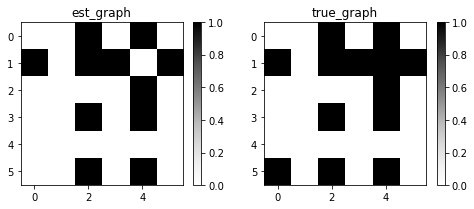

{'fdr': 0.0, 'tpr': 0.8462, 'fpr': 0.0, 'shd': 2, 'nnz': 11, 'precision': 1.0, 'recall': 0.8462, 'F1': 0.9167, 'gscore': 0.8462}


In [10]:
# plot est_dag and true_dag
GraphDAG(daggnn.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(daggnn.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm)

In [12]:
ical = ICALiNGAM()
ical.learn(data=x)

/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, u

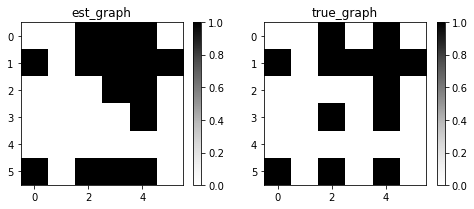

{'fdr': 0.2, 'tpr': 0.9231, 'fpr': 1.5, 'shd': 3, 'nnz': 15, 'precision': 0.8, 'recall': 0.9231, 'F1': 0.8571, 'gscore': 0.6923}


In [13]:
# plot est_dag and true_dag
GraphDAG(ical.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(ical.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm)

2023-03-16 19:55:18,399 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=2000, d=6, iter_=3, h_=1e-08, rho_=1e+16
2023-03-16 19:55:18,513 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=5.244e-01, loss=46.513, rho=1.0e+00


{'loss_type': 'l2'}


2023-03-16 19:55:18,619 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=3.645e-01, loss=2.889, rho=1.0e+00
2023-03-16 19:55:18,714 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=1.691e-01, loss=4.126, rho=1.0e+01
2023-03-16 19:55:18,816 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=6.091e-02, loss=16.503, rho=1.0e+02
2023-03-16 19:55:18,901 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 2] h=3.681e-02, loss=3.851, rho=1.0e+02
2023-03-16 19:55:19,016 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 2] h=1.486e-02, loss=5.520, rho=1.0e+03
2023-03-16 19:55:19,017 - /Users/momo/D

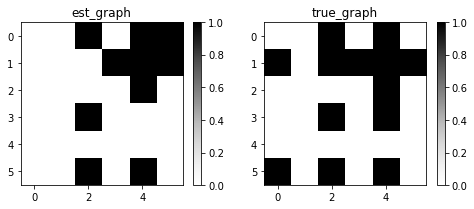

2023-03-16 19:55:19,175 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=2000, d=6, iter_=3, h_=1e-08, rho_=1e+16


{'fdr': 0.1, 'tpr': 0.6923, 'fpr': 0.5, 'shd': 4, 'nnz': 10, 'precision': 0.9, 'recall': 0.6923, 'F1': 0.7826, 'gscore': 0.6154}
{'loss_type': 'logistic'}


2023-03-16 19:55:33,930 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=7.532e+00, loss=4.159, rho=1.0e+00
2023-03-16 19:55:33,947 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=7.532e+00, loss=-23481.349, rho=1.0e+00
2023-03-16 19:55:34,197 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=4.433e+00, loss=-23226.046, rho=1.0e+01
2023-03-16 19:55:37,644 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=2.343e+00, loss=-20673.019, rho=1.0e+02
2023-03-16 19:55:45,647 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=1.235e+00, loss=4857.250, rho=1.0e+03
2023-03-16 19:55:45,66

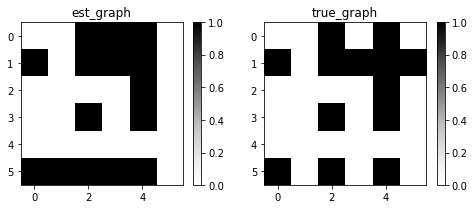

2023-03-16 19:55:50,699 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=2000, d=6, iter_=3, h_=1e-08, rho_=1e+16


{'fdr': 0.2, 'tpr': 0.9231, 'fpr': 1.5, 'shd': 3, 'nnz': 15, 'precision': 0.8, 'recall': 0.9231, 'F1': 0.8571, 'gscore': 0.6923}
{'loss_type': 'poisson'}


2023-03-16 19:55:50,902 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=3.161e-02, loss=6.000, rho=1.0e+00
2023-03-16 19:55:50,927 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=3.132e-02, loss=-11.406, rho=1.0e+00
2023-03-16 19:55:50,983 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=2.916e-02, loss=-11.402, rho=1.0e+01
2023-03-16 19:55:51,097 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=2.036e-02, loss=-11.357, rho=1.0e+02
2023-03-16 19:55:51,282 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=1.040e-02, loss=-10.907, rho=1.0e+03
2023-03-16 19:55:51,477 - /Users

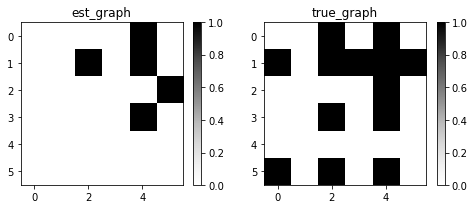

{'fdr': 0.2, 'tpr': 0.3077, 'fpr': 0.5, 'shd': 9, 'nnz': 5, 'precision': 0.8, 'recall': 0.3077, 'F1': 0.4444, 'gscore': 0.2308}


In [14]:
for d in combined_params(consts.NOTEARS_VALID_PARAMS):
    print(d)
    print(f"{'=' * 100}")
    try:
        notear = Notears(**d, max_iter=3)
        notear.learn(data=x)

        GraphDAG(notear.causal_matrix, true_dag)

        # calculate accuracy
        mm = MetricsDAG(notear.causal_matrix, true_dag)
        print(mm.metrics)
        results.append(mm)

    except Exception:
        error_params.append(d)
        print(traceback.format_exc())

2023-03-16 20:44:18,672 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/mcsl.py[line:144] - INFO: GPU is unavailable.
2023-03-16 20:44:18,680 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/trainers/al_trainer.py[line:58] - INFO: Current epoch: 1==================
2023-03-16 20:44:18,692 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/trainers/al_trainer.py[line:97] - INFO: Current loss in step 0: 46.008121240317195
2023-03-16 20:44:18,718 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/trainers/al_trainer.py[line:72] - INFO: Current        h: 0.0
2023-03-16 20:44:18,719 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/trainers/al_trainer.py[line:73] - INFO: Current h_logits: 1.6627337954605421
2023-03-16 20:44:18,719 - /Users/momo/Desktop/CoDiet


{'model_type': 'nn', 'device_type': 'cpu'}


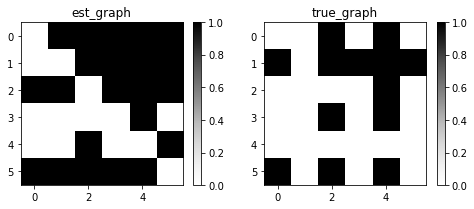

2023-03-16 20:44:18,977 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/mcsl.py[line:144] - INFO: GPU is unavailable.
2023-03-16 20:44:18,981 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/trainers/al_trainer.py[line:58] - INFO: Current epoch: 1==================
2023-03-16 20:44:18,987 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/trainers/al_trainer.py[line:97] - INFO: Current loss in step 0: 47.02732592317024
2023-03-16 20:44:19,004 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/trainers/al_trainer.py[line:72] - INFO: Current        h: 0.0
2023-03-16 20:44:19,004 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/mcsl/torch/trainers/al_trainer.py[line:73] - INFO: Current h_logits: 1.0487487869929248
2023-03-16 20:44:19,005 - /Users/momo/Desktop/CoDiet/

{'fdr': 0.2667, 'tpr': 0.8462, 'fpr': 2.0, 'shd': 4, 'nnz': 15, 'precision': 0.5, 'recall': 0.8462, 'F1': 0.6286, 'gscore': 0.0}

{'model_type': 'qr', 'device_type': 'cpu'}


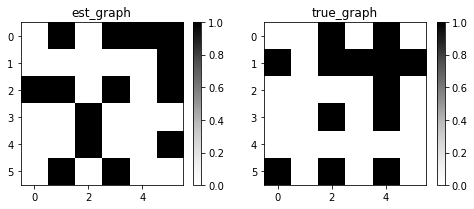

{'fdr': 0.75, 'tpr': 0.2308, 'fpr': 4.5, 'shd': 12, 'nnz': 12, 'precision': 0.2143, 'recall': 0.2308, 'F1': 0.2222, 'gscore': 0.0}


In [11]:
params = add_params(consts.MCSL_VALID_PARAMS)
for d in combined_params(params):
    print(f"\n{'=' * 100}")
    print(d)
    print(f"{'=' * 100}")
    try:
        mcsl = MCSL(**d, max_iter=3, iter_step=3)
        mcsl.learn(data=x,pns_mask=true_dag)
        # plot est_dag and true_dag
        GraphDAG(mcsl.causal_matrix, true_dag)

        # calculate accuracy
        mm = MetricsDAG(mcsl.causal_matrix, true_dag)
        print(mm.metrics)
        results.append(mm)
    except Exception:
        error_params.append(d)
        print(traceback.format_exc())

2023-03-16 20:08:01,620 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/nonlinear.py[line:137] - INFO: GPU is unavailable.
2023-03-16 20:08:01,622 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/nonlinear.py[line:237] - INFO: [start]: n=2000, d=6, iter_=3, h_=1e-08, rho_=10000.0


{'model_type': 'mlp', 'device_type': 'cpu'}


2023-03-16 20:08:19,804 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/nonlinear.py[line:249] - INFO: FINISHED


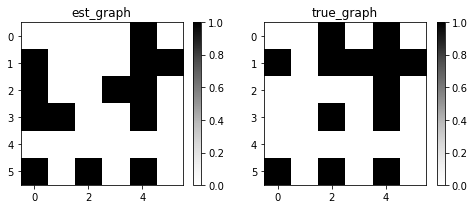

2023-03-16 20:08:19,950 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/nonlinear.py[line:137] - INFO: GPU is unavailable.
2023-03-16 20:08:19,953 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/nonlinear.py[line:237] - INFO: [start]: n=2000, d=6, iter_=3, h_=1e-08, rho_=10000.0


{'fdr': 0.3077, 'tpr': 0.6923, 'fpr': 2.0, 'shd': 5, 'nnz': 13, 'precision': 0.6923, 'recall': 0.6923, 'F1': 0.6923, 'gscore': 0.3846}
{'model_type': 'sob', 'device_type': 'cpu'}


2023-03-16 20:08:20,620 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/torch/nonlinear.py[line:249] - INFO: FINISHED


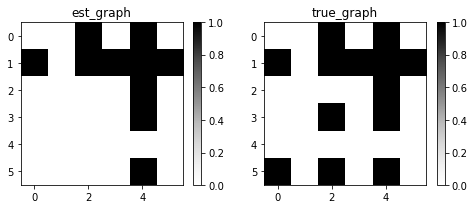

{'fdr': 0.0, 'tpr': 0.7692, 'fpr': 0.0, 'shd': 3, 'nnz': 10, 'precision': 1.0, 'recall': 0.7692, 'F1': 0.8696, 'gscore': 0.7692}


In [16]:
params = add_params(consts.NONLINEAR_NOTEARS_VALID_PARAMS)
for d in combined_params(params):
    print(d)
    print(f"{'=' * 100}")
    try:
        nnl = NotearsNonlinear(**d, max_iter=3, rho_max=1e4)
        nnl.learn(data=x)
        # plot est_dag and true_dag
        GraphDAG(nnl.causal_matrix, true_dag)

        # calculate accuracy
        mm = MetricsDAG(nnl.causal_matrix, true_dag)
        print(mm.metrics)
        results.append(mm)
    except Exception:
        error_params.append(d)
        print(traceback.format_exc())

In [17]:
    nlowrank = NotearsLowRank(max_iter=3)
    nlowrank.learn(data=x, rank=rank)

2023-03-16 20:10:29,103 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/low_rank.py[line:205] - INFO: [start]: n=2000, d=6, iter_=3, h_=1e-06, rho_=1e+20
2023-03-16 20:10:31,358 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/notears/low_rank.py[line:241] - INFO: FINISHED


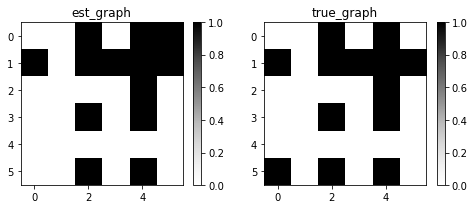

{'fdr': 0.0769, 'tpr': 0.9231, 'fpr': 0.5, 'shd': 1, 'nnz': 13, 'precision': 0.9231, 'recall': 0.9231, 'F1': 0.9231, 'gscore': 0.8462}


In [18]:
# plot est_dag and true_dag
GraphDAG(nlowrank.causal_matrix, true_dag)

# calculate accuracy
mm = MetricsDAG(nlowrank.causal_matrix, true_dag)
print(mm.metrics)
results.append(mm)

In [8]:
import pandas as pd

In [ ]:
for d in combined_params(consts.PC_VALID_PARAMS):
    print(d)
    print(f"{'=' * 100}")
    try:
        pc = PC(**d)
        x = pd.DataFrame(x, columns=list('abcdef'))
        pc.learn(data=x)

        GraphDAG(pc.causal_matrix, true_dag)

        # calculate accuracy
        mm = MetricsDAG(pc.causal_matrix, true_dag)
        print(mm.metrics)
        results.append(mm)
        
    except Exception:
        error_params.append(d)
        print(traceback.format_exc())

2023-03-16 20:13:57,085 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:13:57,090 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:13:57,138 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:13:57,138 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:13:57,150 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0


{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:13:57,166 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.
2023-03-16 20:13:57,375 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.137, max_reward: -0.773, max_reward_batch: -0.773
2023-03-16 20:13:57,376 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.578, cyc_min 19.5
100%|██████████| 3/3 [00:00<00:00,  6.83it/s]
2023-03-16 20:13:57,593 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


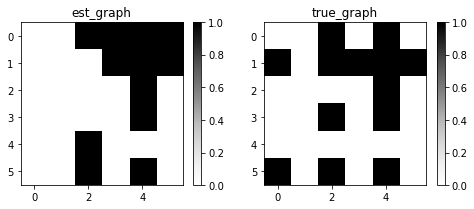

2023-03-16 20:13:57,749 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:13:57,752 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:13:57,797 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:13:57,797 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:13:57,805 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 5, 'nnz': 11, 'precision': 0.75, 'recall': 0.6923, 'F1': 0.72, 'gscore': 0.4615}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:13:57,814 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:13:58,012 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.139, max_reward: -0.7757, max_reward_batch: -0.7757
2023-03-16 20:13:58,013 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.5807, cyc_min 19.5
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo

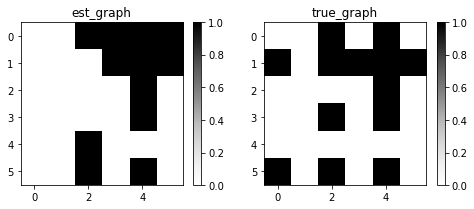

2023-03-16 20:13:58,481 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:13:58,484 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:13:58,498 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:13:58,499 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:13:58,509 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 5, 'nnz': 11, 'precision': 0.75, 'recall': 0.6923, 'F1': 0.72, 'gscore': 0.4615}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:13:58,520 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:13:58,701 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.517, max_reward: -1.174, max_reward_batch: -1.174
2023-03-16 20:13:58,701 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9785, cyc_min 19.5
100%|██████████| 3/3 [00:00<00:00,  7.62it/s]
2023-03-16 20:13:58,905 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


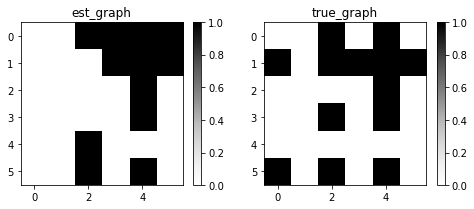

2023-03-16 20:13:59,060 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:13:59,063 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:13:59,108 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:13:59,109 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:13:59,116 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 5, 'nnz': 11, 'precision': 0.75, 'recall': 0.6923, 'F1': 0.72, 'gscore': 0.4615}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:13:59,127 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:13:59,321 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.519, max_reward: -1.176, max_reward_batch: -1.176
2023-03-16 20:13:59,322 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9809, cyc_min 19.5
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

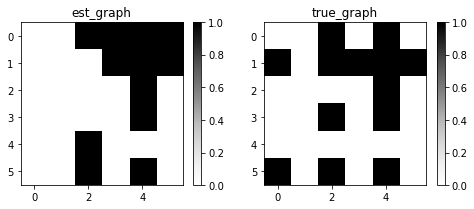

2023-03-16 20:13:59,747 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:13:59,749 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:13:59,764 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:13:59,764 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:13:59,773 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 5, 'nnz': 11, 'precision': 0.75, 'recall': 0.6923, 'F1': 0.72, 'gscore': 0.4615}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:13:59,780 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:13:59,914 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -4.177, max_reward: -1.404, max_reward_batch: -1.404
2023-03-16 20:13:59,916 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.307, cyc_min 9.788
100%|██████████| 3/3 [00:00<00:00,  8.24it/s]
2023-03-16 20:14:00,139 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


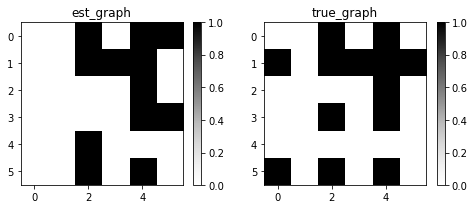

2023-03-16 20:14:00,289 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:00,291 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:00,336 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:00,336 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:00,344 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 5, 'nnz': 11, 'precision': 0.75, 'recall': 0.6923, 'F1': 0.72, 'gscore': 0.4615}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:00,354 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:00,524 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -4.178, max_reward: -1.408, max_reward_batch: -1.408
2023-03-16 20:14:00,524 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.31, cyc_min 9.788
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/op

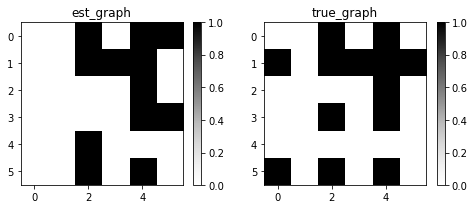

2023-03-16 20:14:00,914 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:00,918 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:00,931 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:00,932 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:00,940 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 5, 'nnz': 11, 'precision': 0.75, 'recall': 0.6923, 'F1': 0.72, 'gscore': 0.4615}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:00,949 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:01,077 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.71, max_reward: -1.616, max_reward_batch: -1.616
2023-03-16 20:14:01,077 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.506, cyc_min 11.02
100%|██████████| 3/3 [00:00<00:00,  9.20it/s]
2023-03-16 20:14:01,268 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


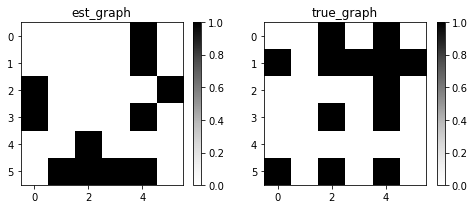

2023-03-16 20:14:01,412 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:01,415 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:01,457 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:01,458 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:01,523 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.5, 'tpr': 0.3846, 'fpr': 2.5, 'shd': 10, 'nnz': 10, 'precision': 0.4545, 'recall': 0.3846, 'F1': 0.4167, 'gscore': 0.0}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:01,531 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:01,690 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.712, max_reward: -1.62, max_reward_batch: -1.62
2023-03-16 20:14:01,691 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.51, cyc_min 11.02
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/opt/

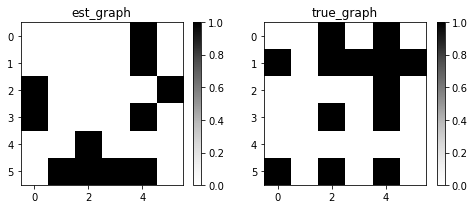

2023-03-16 20:14:02,094 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:02,097 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:02,111 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:02,112 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:02,120 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.5, 'tpr': 0.3846, 'fpr': 2.5, 'shd': 10, 'nnz': 10, 'precision': 0.4545, 'recall': 0.3846, 'F1': 0.4167, 'gscore': 0.0}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:02,129 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:02,265 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.172, max_reward: -0.6608, max_reward_batch: -0.6608
2023-03-16 20:14:02,266 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.2242, cyc_min 43.66
100%|██████████| 3/3 [00:00<00:00,  9.22it/s]
2023-03-16 20:14:02,448 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


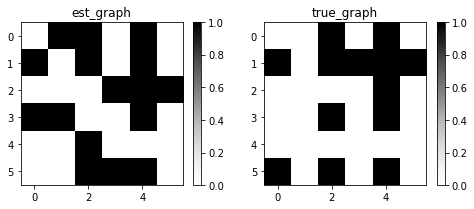

2023-03-16 20:14:02,599 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:02,602 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:02,644 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:02,645 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:02,652 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3077, 'tpr': 0.6923, 'fpr': 2.0, 'shd': 6, 'nnz': 13, 'precision': 0.5625, 'recall': 0.6923, 'F1': 0.6207, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:02,660 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:02,830 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.173, max_reward: -0.6625, max_reward_batch: -0.6625
2023-03-16 20:14:02,830 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.2258, cyc_min 43.66
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/mom

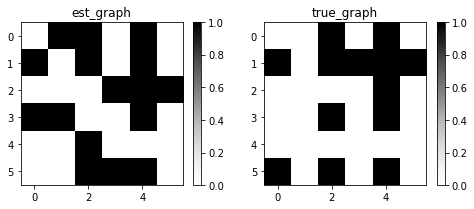

2023-03-16 20:14:03,254 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:03,257 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:03,270 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:03,271 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:03,279 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3077, 'tpr': 0.6923, 'fpr': 2.0, 'shd': 6, 'nnz': 13, 'precision': 0.5625, 'recall': 0.6923, 'F1': 0.6207, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:03,286 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:03,448 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.608, max_reward: -0.7616, max_reward_batch: -0.7616
2023-03-16 20:14:03,449 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.325, cyc_min 43.66
100%|██████████| 3/3 [00:00<00:00,  8.40it/s]
2023-03-16 20:14:03,638 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


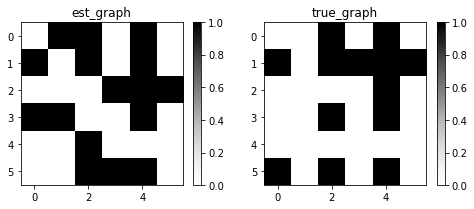

2023-03-16 20:14:03,797 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:03,800 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:03,883 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:03,884 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:03,890 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.3077, 'tpr': 0.6923, 'fpr': 2.0, 'shd': 6, 'nnz': 13, 'precision': 0.5625, 'recall': 0.6923, 'F1': 0.6207, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:03,897 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:04,065 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.61, max_reward: -0.764, max_reward_batch: -0.764
2023-03-16 20:14:04,066 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.3274, cyc_min 43.66
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

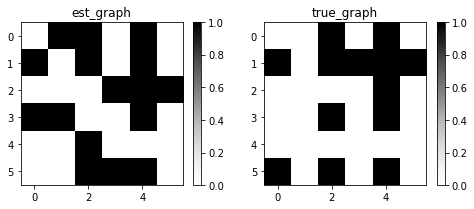

2023-03-16 20:14:04,481 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:04,485 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:04,502 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:04,504 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:04,514 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.3077, 'tpr': 0.6923, 'fpr': 2.0, 'shd': 6, 'nnz': 13, 'precision': 0.5625, 'recall': 0.6923, 'F1': 0.6207, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:04,522 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:04,710 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.832, max_reward: -1.125, max_reward_batch: -1.125
2023-03-16 20:14:04,710 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9707, cyc_min 15.4
100%|██████████| 3/3 [00:00<00:00,  6.16it/s]
2023-03-16 20:14:05,003 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


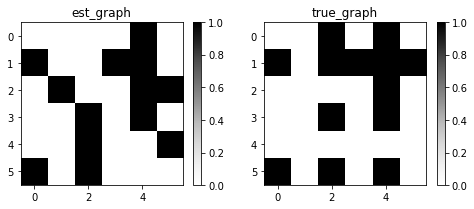

2023-03-16 20:14:05,202 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:05,205 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:05,251 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:05,251 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:05,261 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 4, 'nnz': 11, 'precision': 0.6923, 'recall': 0.6923, 'F1': 0.6923, 'gscore': 0.3846}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:05,276 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:05,509 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.834, max_reward: -1.129, max_reward_batch: -1.129
2023-03-16 20:14:05,510 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9754, cyc_min 15.4
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

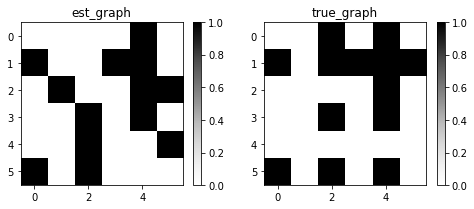

2023-03-16 20:14:05,955 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:05,958 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:05,971 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:05,972 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:05,980 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 4, 'nnz': 11, 'precision': 0.6923, 'recall': 0.6923, 'F1': 0.6923, 'gscore': 0.3846}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:05,989 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:06,175 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.453, max_reward: -1.05, max_reward_batch: -1.05
2023-03-16 20:14:06,176 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7631, cyc_min 28.73
100%|██████████| 3/3 [00:00<00:00,  6.04it/s]
2023-03-16 20:14:06,479 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


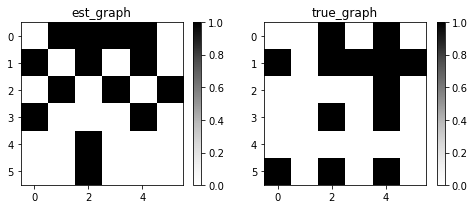

2023-03-16 20:14:06,623 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:06,626 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:06,671 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:06,672 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:06,680 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5, 'recall': 0.5385, 'F1': 0.5185, 'gscore': 0.0}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:06,688 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:06,923 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.455, max_reward: -1.053, max_reward_batch: -1.053
2023-03-16 20:14:06,924 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.766, cyc_min 28.73
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

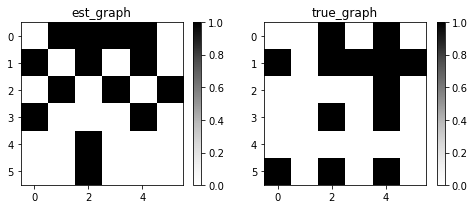

2023-03-16 20:14:07,372 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:07,375 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:07,390 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:07,391 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:07,399 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5, 'recall': 0.5385, 'F1': 0.5185, 'gscore': 0.0}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:07,416 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:07,610 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.832, max_reward: -1.125, max_reward_batch: -1.125
2023-03-16 20:14:07,611 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9707, cyc_min 15.4
100%|██████████| 3/3 [00:00<00:00,  6.11it/s]
2023-03-16 20:14:07,895 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


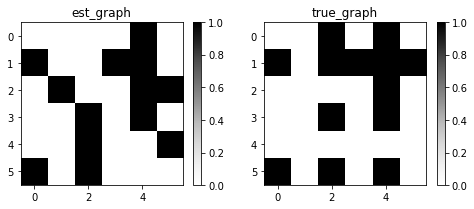

2023-03-16 20:14:08,040 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:08,043 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:08,088 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:08,088 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:08,096 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 4, 'nnz': 11, 'precision': 0.6923, 'recall': 0.6923, 'F1': 0.6923, 'gscore': 0.3846}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:08,105 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:08,347 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.834, max_reward: -1.129, max_reward_batch: -1.129
2023-03-16 20:14:08,348 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9754, cyc_min 15.4
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

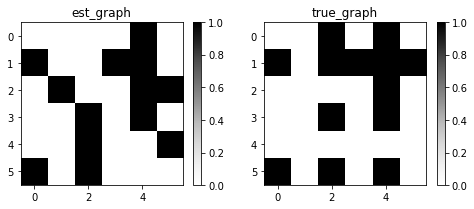

2023-03-16 20:14:08,843 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:08,845 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:08,859 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:08,860 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:08,946 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 4, 'nnz': 11, 'precision': 0.6923, 'recall': 0.6923, 'F1': 0.6923, 'gscore': 0.3846}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:08,953 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:09,145 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.453, max_reward: -1.05, max_reward_batch: -1.05
2023-03-16 20:14:09,146 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7631, cyc_min 28.73
100%|██████████| 3/3 [00:00<00:00,  6.44it/s]
2023-03-16 20:14:09,413 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


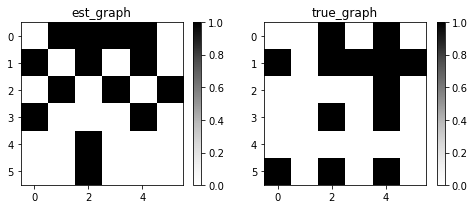

2023-03-16 20:14:09,561 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:09,563 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:09,641 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:09,641 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:09,649 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5, 'recall': 0.5385, 'F1': 0.5185, 'gscore': 0.0}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:09,657 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:09,907 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.455, max_reward: -1.053, max_reward_batch: -1.053
2023-03-16 20:14:09,908 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.766, cyc_min 28.73
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

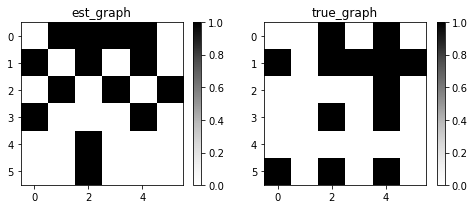

2023-03-16 20:14:10,383 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:10,386 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:10,399 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:10,400 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:10,409 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5, 'recall': 0.5385, 'F1': 0.5185, 'gscore': 0.0}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:10,417 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:10,629 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.832, max_reward: -1.125, max_reward_batch: -1.125
2023-03-16 20:14:10,629 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9707, cyc_min 15.4
100%|██████████| 3/3 [00:00<00:00,  6.09it/s]
2023-03-16 20:14:10,903 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


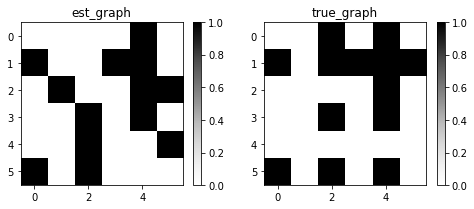

2023-03-16 20:14:11,049 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:11,052 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:11,131 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:11,131 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:11,140 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 4, 'nnz': 11, 'precision': 0.6923, 'recall': 0.6923, 'F1': 0.6923, 'gscore': 0.3846}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:11,149 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:11,380 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.834, max_reward: -1.129, max_reward_batch: -1.129
2023-03-16 20:14:11,380 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9754, cyc_min 15.4
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

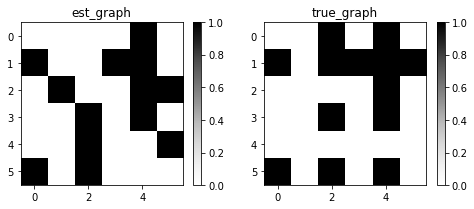

2023-03-16 20:14:11,817 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:11,820 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:11,833 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:11,834 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:11,843 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1818, 'tpr': 0.6923, 'fpr': 1.0, 'shd': 4, 'nnz': 11, 'precision': 0.6923, 'recall': 0.6923, 'F1': 0.6923, 'gscore': 0.3846}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:11,851 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:12,071 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.453, max_reward: -1.05, max_reward_batch: -1.05
2023-03-16 20:14:12,071 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7631, cyc_min 28.73
100%|██████████| 3/3 [00:00<00:00,  6.04it/s]
2023-03-16 20:14:12,342 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


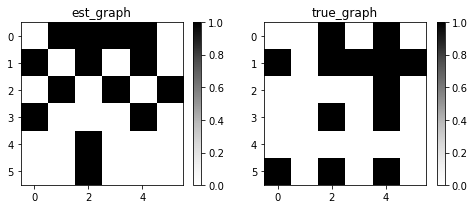

2023-03-16 20:14:12,489 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:12,492 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:12,565 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:12,566 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:12,573 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5, 'recall': 0.5385, 'F1': 0.5185, 'gscore': 0.0}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:12,580 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:12,810 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.455, max_reward: -1.053, max_reward_batch: -1.053
2023-03-16 20:14:12,811 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.766, cyc_min 28.73
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

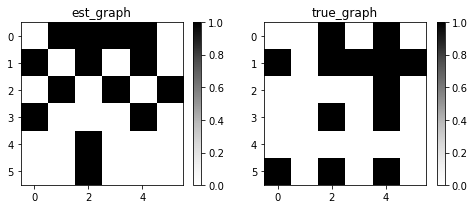

2023-03-16 20:14:13,320 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:13,322 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:13,336 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:13,336 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:13,344 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5, 'recall': 0.5385, 'F1': 0.5185, 'gscore': 0.0}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:13,356 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:13,505 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.042, max_reward: -1.047, max_reward_batch: -1.047
2023-03-16 20:14:13,505 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8909, cyc_min 15.66
100%|██████████| 3/3 [00:00<00:00,  8.92it/s]
2023-03-16 20:14:13,683 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


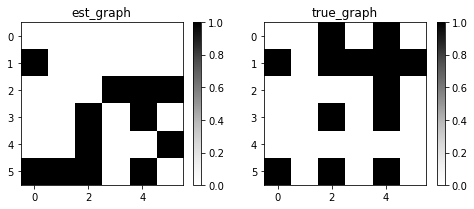

2023-03-16 20:14:13,843 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:13,845 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:13,887 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:13,888 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:13,895 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:13,903 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:14,078 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.045, max_reward: -1.05, max_reward_batch: -1.05
2023-03-16 20:14:14,079 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8929, cyc_min 15.66
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/op

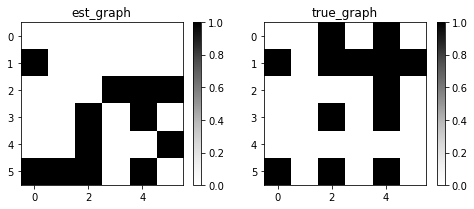

2023-03-16 20:14:14,440 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:14,443 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:14,456 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:14,457 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:14,465 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:14,473 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:14,640 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.596, max_reward: -1.212, max_reward_batch: -1.212
2023-03-16 20:14:14,640 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.056, cyc_min 15.66
100%|██████████| 3/3 [00:00<00:00,  8.52it/s]
2023-03-16 20:14:14,819 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


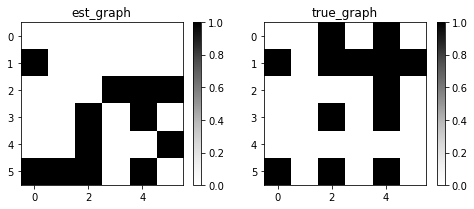

2023-03-16 20:14:14,965 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:14,968 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:15,013 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:15,014 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:15,021 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:15,029 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:15,216 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.598, max_reward: -1.214, max_reward_batch: -1.214
2023-03-16 20:14:15,217 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.058, cyc_min 15.66
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

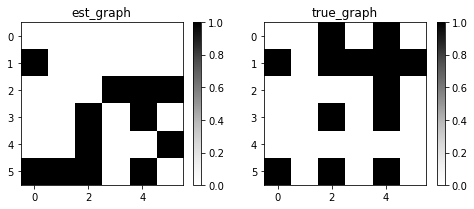

2023-03-16 20:14:15,606 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:15,609 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:15,623 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:15,623 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:15,631 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:15,640 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:15,808 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.042, max_reward: -1.047, max_reward_batch: -1.047
2023-03-16 20:14:15,808 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8909, cyc_min 15.66
100%|██████████| 3/3 [00:00<00:00,  8.47it/s]
2023-03-16 20:14:15,988 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


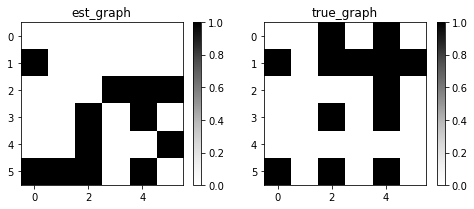

2023-03-16 20:14:16,138 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:16,140 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:16,185 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:16,185 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:16,261 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:16,277 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:16,465 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.045, max_reward: -1.05, max_reward_batch: -1.05
2023-03-16 20:14:16,465 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8929, cyc_min 15.66
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/op

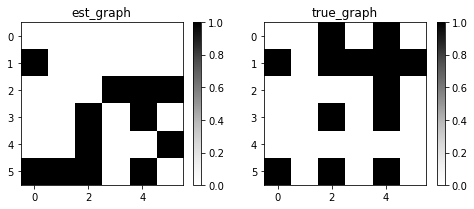

2023-03-16 20:14:16,811 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:16,813 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:16,851 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:16,852 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:16,860 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:16,874 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:17,014 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.596, max_reward: -1.212, max_reward_batch: -1.212
2023-03-16 20:14:17,014 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.056, cyc_min 15.66
100%|██████████| 3/3 [00:00<00:00,  7.71it/s]
2023-03-16 20:14:17,255 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


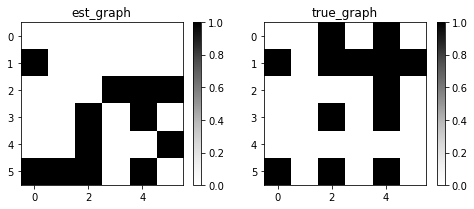

2023-03-16 20:14:17,408 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:17,410 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:17,455 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:17,456 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:17,463 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:17,472 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:17,692 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.598, max_reward: -1.214, max_reward_batch: -1.214
2023-03-16 20:14:17,692 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.058, cyc_min 15.66
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

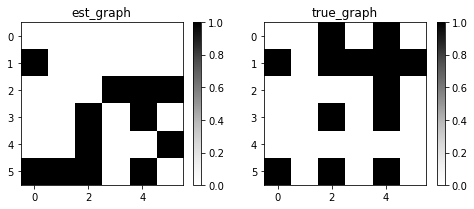

2023-03-16 20:14:18,061 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:18,063 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:18,079 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:18,088 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:18,110 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:18,121 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:18,278 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.042, max_reward: -1.047, max_reward_batch: -1.047
2023-03-16 20:14:18,278 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8909, cyc_min 15.66
100%|██████████| 3/3 [00:00<00:00,  8.51it/s]
2023-03-16 20:14:18,464 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


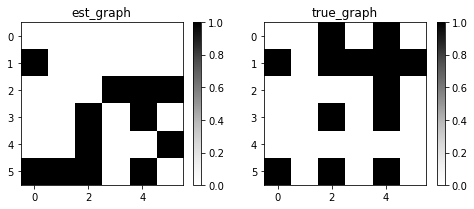

2023-03-16 20:14:18,618 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:18,621 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:18,695 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:18,699 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:18,707 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:18,715 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:18,900 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.045, max_reward: -1.05, max_reward_batch: -1.05
2023-03-16 20:14:18,901 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8929, cyc_min 15.66
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/op

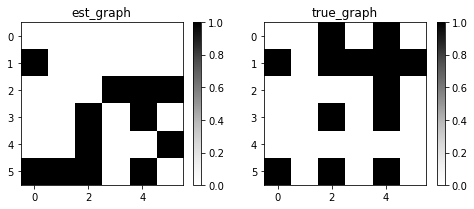

2023-03-16 20:14:19,304 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:19,307 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:19,322 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:19,322 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:19,330 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:19,338 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:19,485 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.596, max_reward: -1.212, max_reward_batch: -1.212
2023-03-16 20:14:19,485 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.056, cyc_min 15.66
100%|██████████| 3/3 [00:00<00:00,  7.83it/s]
2023-03-16 20:14:19,715 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


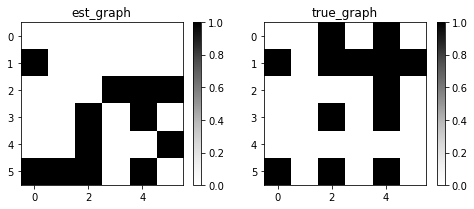

2023-03-16 20:14:19,924 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:19,927 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:19,973 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:19,973 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:19,981 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:19,989 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:20,214 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.598, max_reward: -1.214, max_reward_batch: -1.214
2023-03-16 20:14:20,215 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.058, cyc_min 15.66
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

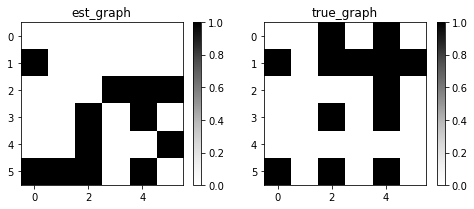

2023-03-16 20:14:20,588 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:20,590 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:20,605 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:20,605 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:20,613 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.125, 'tpr': 0.5385, 'fpr': 0.5, 'shd': 6, 'nnz': 8, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:20,622 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:20,785 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.91, max_reward: -1.065, max_reward_batch: -1.065
2023-03-16 20:14:20,785 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8317, cyc_min 23.34
100%|██████████| 3/3 [00:00<00:00,  7.81it/s]
2023-03-16 20:14:21,000 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


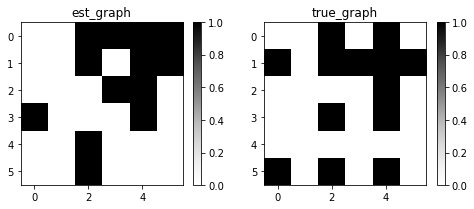

2023-03-16 20:14:21,172 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:21,175 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:21,221 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:21,221 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:21,229 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.6154, 'recall': 0.6154, 'F1': 0.6154, 'gscore': 0.2308}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:21,237 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:21,441 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.913, max_reward: -1.07, max_reward_batch: -1.07
2023-03-16 20:14:21,442 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8366, cyc_min 23.34
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/op

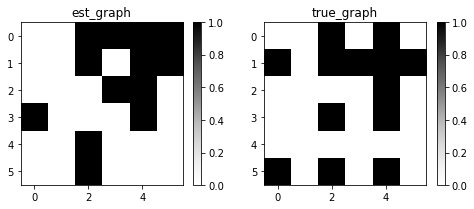

2023-03-16 20:14:21,874 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:21,876 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:21,891 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:21,892 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:21,900 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.6154, 'recall': 0.6154, 'F1': 0.6154, 'gscore': 0.2308}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:21,909 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:22,117 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.754, max_reward: -1.316, max_reward_batch: -1.316
2023-03-16 20:14:22,118 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.083, cyc_min 23.34
100%|██████████| 3/3 [00:00<00:00,  6.99it/s]
2023-03-16 20:14:22,333 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


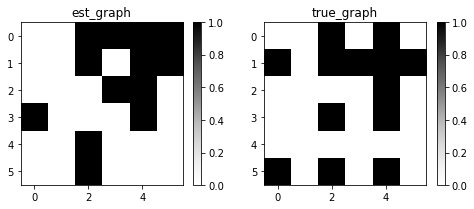

2023-03-16 20:14:22,482 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:22,486 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:22,562 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:22,562 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:22,574 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.6154, 'recall': 0.6154, 'F1': 0.6154, 'gscore': 0.2308}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:22,583 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:22,785 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.756, max_reward: -1.32, max_reward_batch: -1.32
2023-03-16 20:14:22,785 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.087, cyc_min 23.34
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/opt

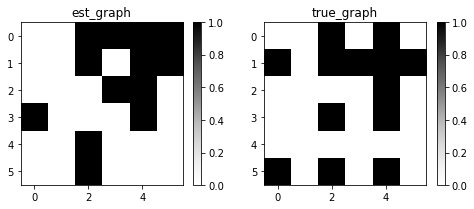

2023-03-16 20:14:23,223 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:23,225 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:23,239 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:23,240 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:23,314 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.6154, 'recall': 0.6154, 'F1': 0.6154, 'gscore': 0.2308}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:23,324 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:23,506 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.455, max_reward: -1.231, max_reward_batch: -1.231
2023-03-16 20:14:23,506 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.116, cyc_min 11.55
100%|██████████| 3/3 [00:00<00:00,  7.51it/s]
2023-03-16 20:14:23,716 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


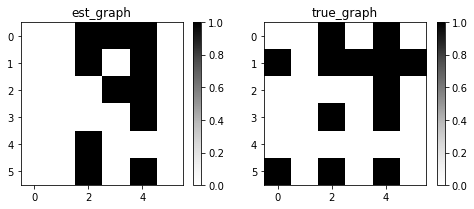

2023-03-16 20:14:23,869 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:23,872 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:23,917 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:23,917 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:23,925 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2, 'tpr': 0.6154, 'fpr': 1.0, 'shd': 6, 'nnz': 10, 'precision': 0.7273, 'recall': 0.6154, 'F1': 0.6667, 'gscore': 0.3846}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:23,933 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:24,129 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.457, max_reward: -1.235, max_reward_batch: -1.235
2023-03-16 20:14:24,129 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.119, cyc_min 11.55
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

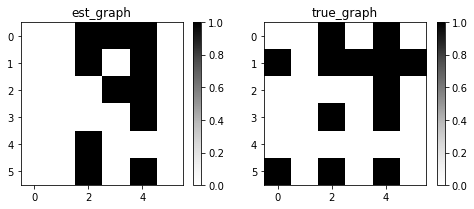

2023-03-16 20:14:24,550 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:24,552 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:24,567 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:24,568 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:24,577 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2, 'tpr': 0.6154, 'fpr': 1.0, 'shd': 6, 'nnz': 10, 'precision': 0.7273, 'recall': 0.6154, 'F1': 0.6667, 'gscore': 0.3846}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:24,586 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:24,753 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.208, max_reward: -1.375, max_reward_batch: -1.375
2023-03-16 20:14:24,754 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.096, cyc_min 27.87
100%|██████████| 3/3 [00:00<00:00,  7.14it/s]
2023-03-16 20:14:24,999 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


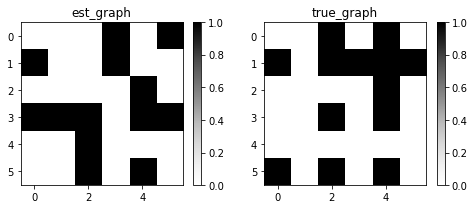

2023-03-16 20:14:25,149 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:25,151 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:25,199 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:25,199 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:25,207 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.5385, 'recall': 0.5385, 'F1': 0.5385, 'gscore': 0.0769}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:25,215 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:25,452 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.21, max_reward: -1.377, max_reward_batch: -1.377
2023-03-16 20:14:25,453 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.098, cyc_min 27.87
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/op

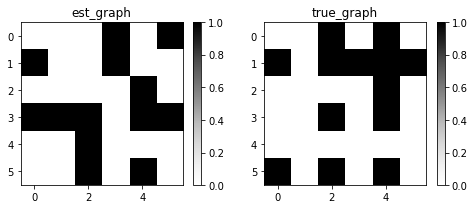

2023-03-16 20:14:25,868 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:25,871 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:25,889 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:25,891 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:25,900 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.5385, 'recall': 0.5385, 'F1': 0.5385, 'gscore': 0.0769}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:25,909 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:26,060 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.01, max_reward: -0.8652, max_reward_batch: -0.8652
2023-03-16 20:14:26,061 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.6774, cyc_min 18.78
100%|██████████| 3/3 [00:00<00:00,  8.01it/s]
2023-03-16 20:14:26,278 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


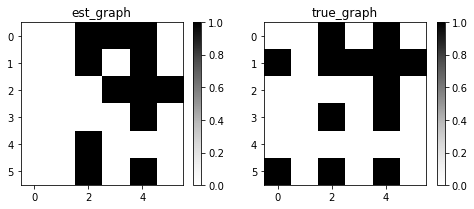

2023-03-16 20:14:26,450 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:26,453 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:26,501 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:26,502 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:26,510 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2, 'tpr': 0.6154, 'fpr': 1.0, 'shd': 6, 'nnz': 10, 'precision': 0.6667, 'recall': 0.6154, 'F1': 0.64, 'gscore': 0.3077}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:26,524 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:26,736 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.012, max_reward: -0.8679, max_reward_batch: -0.8679
2023-03-16 20:14:26,736 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.6801, cyc_min 18.78
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/mom

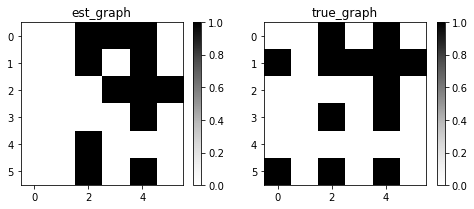

2023-03-16 20:14:27,262 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:27,264 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:27,278 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:27,279 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:27,287 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2, 'tpr': 0.6154, 'fpr': 1.0, 'shd': 6, 'nnz': 10, 'precision': 0.6667, 'recall': 0.6154, 'F1': 0.64, 'gscore': 0.3077}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:27,295 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:27,449 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.88, max_reward: -1.278, max_reward_batch: -1.278
2023-03-16 20:14:27,450 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9025, cyc_min 37.56
100%|██████████| 3/3 [00:00<00:00,  7.53it/s]
2023-03-16 20:14:27,687 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


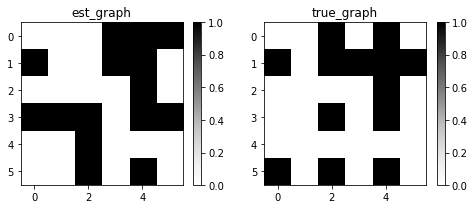

2023-03-16 20:14:27,842 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:27,845 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:27,891 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:27,892 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:27,899 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.25, 'tpr': 0.6923, 'fpr': 1.5, 'shd': 6, 'nnz': 12, 'precision': 0.6, 'recall': 0.6923, 'F1': 0.6429, 'gscore': 0.2308}

{'encoder_type': 'TransformerEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:27,906 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:28,094 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.882, max_reward: -1.28, max_reward_batch: -1.28
2023-03-16 20:14:28,094 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9047, cyc_min 37.56
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/op

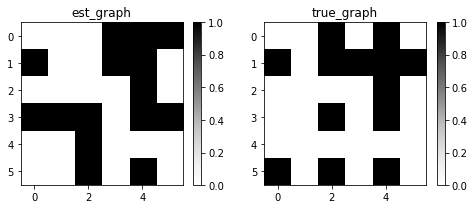

2023-03-16 20:14:28,538 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:28,541 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:28,556 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:28,556 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:28,559 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.25, 'tpr': 0.6923, 'fpr': 1.5, 'shd': 6, 'nnz': 12, 'precision': 0.6, 'recall': 0.6923, 'F1': 0.6429, 'gscore': 0.2308}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:28,569 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:28,925 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.676, max_reward: -0.8923, max_reward_batch: -0.8923
2023-03-16 20:14:28,926 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7359, cyc_min 15.64
100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
2023-03-16 20:14:29,396 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


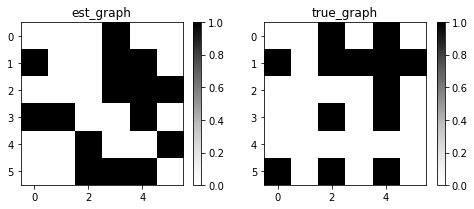

2023-03-16 20:14:29,558 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:29,563 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:29,608 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:29,609 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:29,612 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:29,623 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:29,972 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.679, max_reward: -0.8932, max_reward_batch: -0.8932
2023-03-16 20:14:29,972 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7368, cyc_min 15.64
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/mom

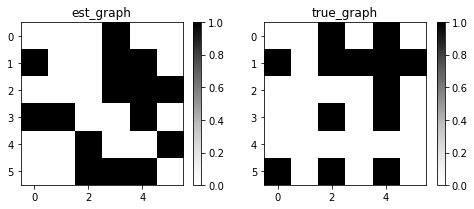

2023-03-16 20:14:30,642 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:30,645 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:30,659 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:30,660 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:30,662 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:30,672 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:30,975 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.38, max_reward: -0.912, max_reward_batch: -0.912
2023-03-16 20:14:30,976 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7556, cyc_min 15.64
100%|██████████| 3/3 [00:00<00:00,  3.96it/s]
2023-03-16 20:14:31,422 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


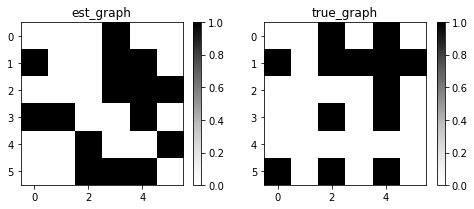

2023-03-16 20:14:31,583 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:31,586 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:31,628 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:31,628 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:31,630 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:31,699 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:32,012 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.382, max_reward: -0.9152, max_reward_batch: -0.9152
2023-03-16 20:14:32,012 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7588, cyc_min 15.64
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/mom

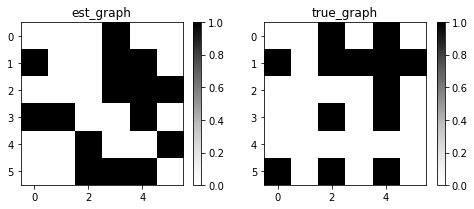

2023-03-16 20:14:32,648 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:32,651 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:32,665 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:32,665 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:32,668 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:32,680 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:32,996 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.676, max_reward: -0.8923, max_reward_batch: -0.8923
2023-03-16 20:14:32,996 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7359, cyc_min 15.64
100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
2023-03-16 20:14:33,431 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


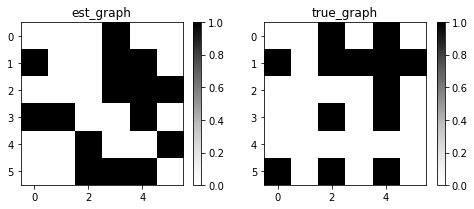

2023-03-16 20:14:33,595 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:33,598 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:33,641 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:33,642 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:33,643 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:33,659 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:33,977 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.679, max_reward: -0.8932, max_reward_batch: -0.8932
2023-03-16 20:14:33,978 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7368, cyc_min 15.64
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/mom

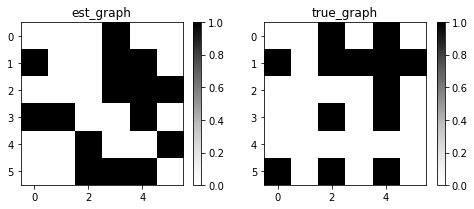

2023-03-16 20:14:34,612 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:34,615 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:34,629 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:34,629 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:34,632 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:34,643 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:34,949 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.38, max_reward: -0.912, max_reward_batch: -0.912
2023-03-16 20:14:34,949 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7556, cyc_min 15.64
100%|██████████| 3/3 [00:00<00:00,  3.94it/s]
2023-03-16 20:14:35,396 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


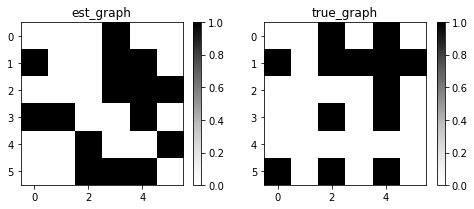

2023-03-16 20:14:35,545 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:35,547 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:35,590 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:35,591 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:35,592 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:35,599 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:35,932 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.382, max_reward: -0.9152, max_reward_batch: -0.9152
2023-03-16 20:14:35,933 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7588, cyc_min 15.64
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/mom

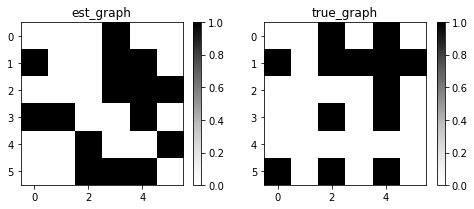

2023-03-16 20:14:36,577 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:36,580 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:36,593 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:36,593 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:36,596 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:36,606 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:36,908 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.676, max_reward: -0.8923, max_reward_batch: -0.8923
2023-03-16 20:14:36,909 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7359, cyc_min 15.64
100%|██████████| 3/3 [00:00<00:00,  4.02it/s]
2023-03-16 20:14:37,345 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


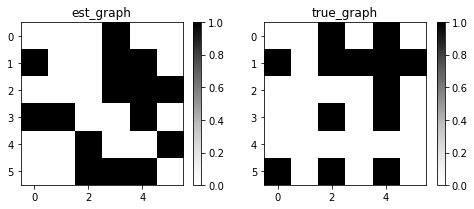

2023-03-16 20:14:37,548 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:37,551 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:37,626 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:37,626 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:37,628 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:37,636 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:37,969 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.679, max_reward: -0.8932, max_reward_batch: -0.8932
2023-03-16 20:14:37,970 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7368, cyc_min 15.64
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/mom

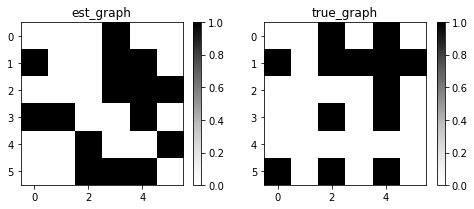

2023-03-16 20:14:38,601 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:38,604 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:38,617 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:38,618 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:38,621 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:38,630 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:38,911 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.38, max_reward: -0.912, max_reward_batch: -0.912
2023-03-16 20:14:38,911 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7556, cyc_min 15.64
100%|██████████| 3/3 [00:00<00:00,  4.00it/s]
2023-03-16 20:14:39,373 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


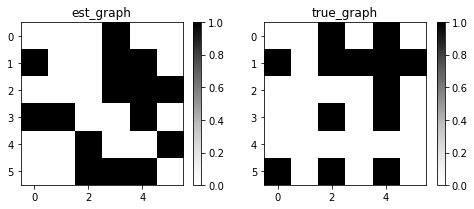

2023-03-16 20:14:39,528 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:39,530 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:39,574 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:39,575 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:39,577 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'SingleLayerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:39,585 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:39,932 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.382, max_reward: -0.9152, max_reward_batch: -0.9152
2023-03-16 20:14:39,933 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.7588, cyc_min 15.64
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/mom

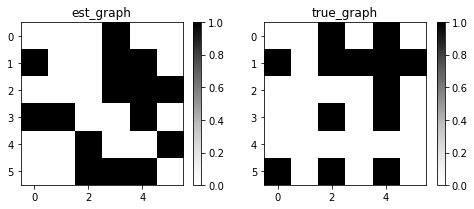

2023-03-16 20:14:40,544 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:40,547 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:40,559 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:40,560 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:40,564 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 8, 'nnz': 10, 'precision': 0.4667, 'recall': 0.5385, 'F1': 0.5, 'gscore': 0.0}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:40,574 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:40,891 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.721, max_reward: -1.074, max_reward_batch: -1.074
2023-03-16 20:14:40,892 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9736, cyc_min 10.05
100%|██████████| 3/3 [00:00<00:00,  3.47it/s]
2023-03-16 20:14:41,431 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


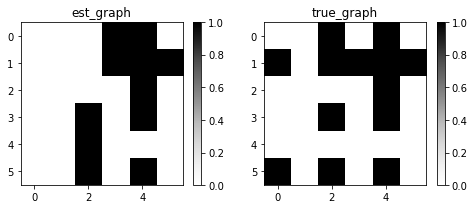

2023-03-16 20:14:41,582 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:41,584 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:41,630 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:41,630 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:41,634 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1, 'tpr': 0.6923, 'fpr': 0.5, 'shd': 5, 'nnz': 10, 'precision': 0.8182, 'recall': 0.6923, 'F1': 0.75, 'gscore': 0.5385}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:41,642 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:42,033 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.724, max_reward: -1.078, max_reward_batch: -1.078
2023-03-16 20:14:42,033 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9774, cyc_min 10.05
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/

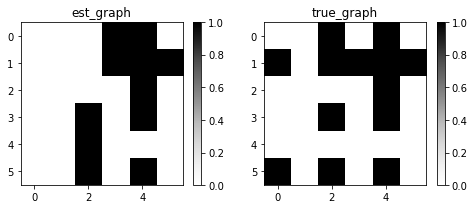

2023-03-16 20:14:42,720 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:42,723 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:42,736 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:42,737 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:42,741 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1, 'tpr': 0.6923, 'fpr': 0.5, 'shd': 5, 'nnz': 10, 'precision': 0.8182, 'recall': 0.6923, 'F1': 0.75, 'gscore': 0.5385}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:42,832 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:43,149 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.364, max_reward: -1.297, max_reward_batch: -1.297
2023-03-16 20:14:43,149 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.103, cyc_min 19.39
100%|██████████| 3/3 [00:00<00:00,  3.26it/s]
2023-03-16 20:14:43,663 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


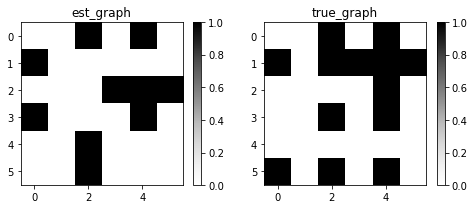

2023-03-16 20:14:43,824 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:43,827 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:43,873 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:43,875 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:43,880 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.25, 'tpr': 0.4615, 'fpr': 1.0, 'shd': 8, 'nnz': 8, 'precision': 0.6, 'recall': 0.4615, 'F1': 0.5217, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:43,892 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:44,252 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.367, max_reward: -1.301, max_reward_batch: -1.301
2023-03-16 20:14:44,253 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.107, cyc_min 19.39
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

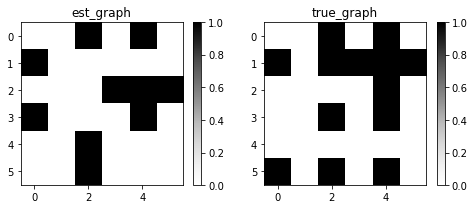

2023-03-16 20:14:44,965 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:44,968 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:44,984 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:44,985 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:44,989 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.25, 'tpr': 0.4615, 'fpr': 1.0, 'shd': 8, 'nnz': 8, 'precision': 0.6, 'recall': 0.4615, 'F1': 0.5217, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:44,997 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:45,317 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.721, max_reward: -1.074, max_reward_batch: -1.074
2023-03-16 20:14:45,318 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9736, cyc_min 10.05
100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
2023-03-16 20:14:45,877 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


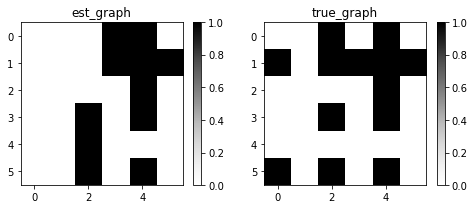

2023-03-16 20:14:46,030 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:46,032 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:46,073 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:46,073 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:46,076 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1, 'tpr': 0.6923, 'fpr': 0.5, 'shd': 5, 'nnz': 10, 'precision': 0.8182, 'recall': 0.6923, 'F1': 0.75, 'gscore': 0.5385}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:46,083 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:46,463 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.724, max_reward: -1.078, max_reward_batch: -1.078
2023-03-16 20:14:46,464 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9774, cyc_min 10.05
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/

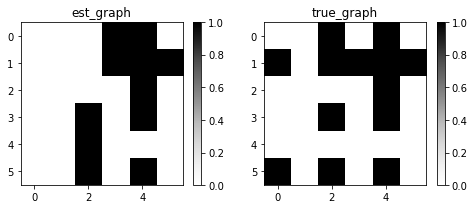

2023-03-16 20:14:47,187 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:47,189 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:47,202 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:47,203 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:47,207 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1, 'tpr': 0.6923, 'fpr': 0.5, 'shd': 5, 'nnz': 10, 'precision': 0.8182, 'recall': 0.6923, 'F1': 0.75, 'gscore': 0.5385}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:47,216 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:47,565 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.364, max_reward: -1.297, max_reward_batch: -1.297
2023-03-16 20:14:47,565 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.103, cyc_min 19.39
100%|██████████| 3/3 [00:00<00:00,  3.46it/s]
2023-03-16 20:14:48,078 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


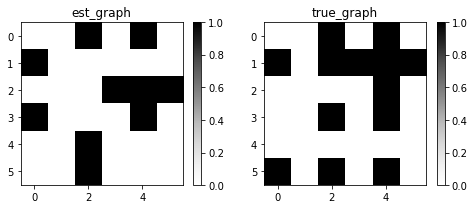

2023-03-16 20:14:48,251 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:48,254 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:48,297 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:48,298 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:48,301 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.25, 'tpr': 0.4615, 'fpr': 1.0, 'shd': 8, 'nnz': 8, 'precision': 0.6, 'recall': 0.4615, 'F1': 0.5217, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:48,309 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:48,683 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.367, max_reward: -1.301, max_reward_batch: -1.301
2023-03-16 20:14:48,683 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.107, cyc_min 19.39
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

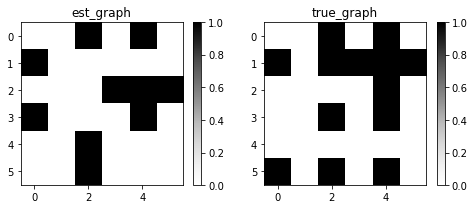

2023-03-16 20:14:49,453 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:49,456 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:49,469 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:49,470 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:49,474 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.25, 'tpr': 0.4615, 'fpr': 1.0, 'shd': 8, 'nnz': 8, 'precision': 0.6, 'recall': 0.4615, 'F1': 0.5217, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:49,483 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:49,832 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.721, max_reward: -1.074, max_reward_batch: -1.074
2023-03-16 20:14:49,833 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9736, cyc_min 10.05
100%|██████████| 3/3 [00:00<00:00,  3.38it/s]
2023-03-16 20:14:50,364 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


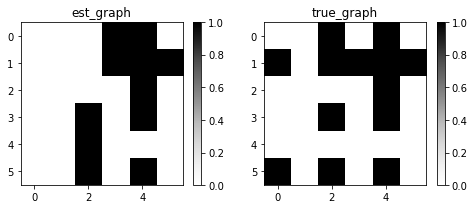

2023-03-16 20:14:50,512 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:50,515 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:50,558 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:50,559 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:50,562 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1, 'tpr': 0.6923, 'fpr': 0.5, 'shd': 5, 'nnz': 10, 'precision': 0.8182, 'recall': 0.6923, 'F1': 0.75, 'gscore': 0.5385}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:50,570 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:50,959 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.724, max_reward: -1.078, max_reward_batch: -1.078
2023-03-16 20:14:50,960 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9774, cyc_min 10.05
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/

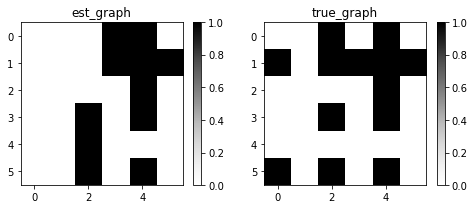

2023-03-16 20:14:51,657 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:51,659 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:51,672 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:51,673 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:51,676 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.1, 'tpr': 0.6923, 'fpr': 0.5, 'shd': 5, 'nnz': 10, 'precision': 0.8182, 'recall': 0.6923, 'F1': 0.75, 'gscore': 0.5385}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:51,689 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:52,019 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.364, max_reward: -1.297, max_reward_batch: -1.297
2023-03-16 20:14:52,019 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.103, cyc_min 19.39
100%|██████████| 3/3 [00:00<00:00,  3.40it/s]
2023-03-16 20:14:52,563 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


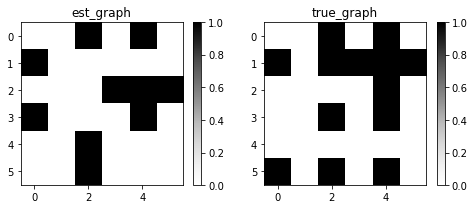

2023-03-16 20:14:52,713 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:52,715 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:52,757 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:52,757 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:52,761 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.25, 'tpr': 0.4615, 'fpr': 1.0, 'shd': 8, 'nnz': 8, 'precision': 0.6, 'recall': 0.4615, 'F1': 0.5217, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'TransformerDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:52,768 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:53,166 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.367, max_reward: -1.301, max_reward_batch: -1.301
2023-03-16 20:14:53,167 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.107, cyc_min 19.39
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

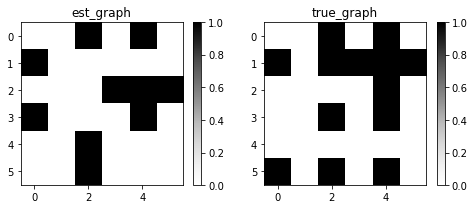

2023-03-16 20:14:53,850 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:53,853 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:53,866 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:53,867 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:53,869 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.25, 'tpr': 0.4615, 'fpr': 1.0, 'shd': 8, 'nnz': 8, 'precision': 0.6, 'recall': 0.4615, 'F1': 0.5217, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:53,879 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:54,202 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.719, max_reward: -1.02, max_reward_batch: -1.02
2023-03-16 20:14:54,203 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8799, cyc_min 13.98
100%|██████████| 3/3 [00:00<00:00,  3.94it/s]
2023-03-16 20:14:54,634 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


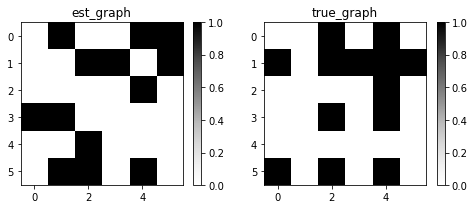

2023-03-16 20:14:54,794 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:54,797 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:54,844 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:54,844 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:54,846 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5385, 'recall': 0.5385, 'F1': 0.5385, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:54,915 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:55,261 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.721, max_reward: -1.023, max_reward_batch: -1.023
2023-03-16 20:14:55,262 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8827, cyc_min 13.98
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/

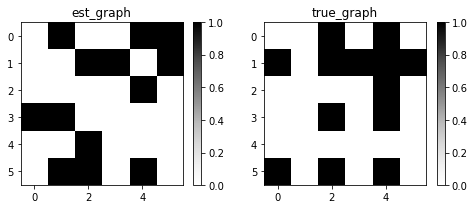

2023-03-16 20:14:55,876 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:55,879 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:55,892 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:55,893 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:55,896 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5385, 'recall': 0.5385, 'F1': 0.5385, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:55,918 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:56,238 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.382, max_reward: -1.252, max_reward_batch: -1.252
2023-03-16 20:14:56,238 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9127, cyc_min 33.92
100%|██████████| 3/3 [00:00<00:00,  3.93it/s]
2023-03-16 20:14:56,678 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


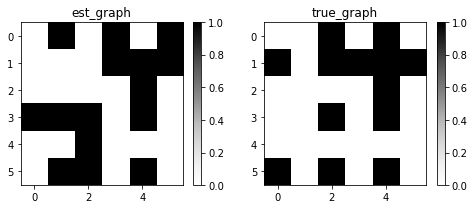

2023-03-16 20:14:56,828 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:56,831 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:56,874 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:14:56,875 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:14:56,877 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.5333, 'recall': 0.6154, 'F1': 0.5714, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:56,884 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:57,199 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.385, max_reward: -1.253, max_reward_batch: -1.253
2023-03-16 20:14:57,200 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9141, cyc_min 33.92
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/

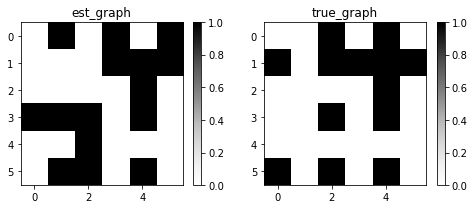

2023-03-16 20:14:57,855 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:57,857 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:57,871 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:14:57,871 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:14:57,873 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.5333, 'recall': 0.6154, 'F1': 0.5714, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:57,884 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:58,167 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.719, max_reward: -1.02, max_reward_batch: -1.02
2023-03-16 20:14:58,168 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8799, cyc_min 13.98
100%|██████████| 3/3 [00:00<00:00,  3.96it/s]
2023-03-16 20:14:58,633 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


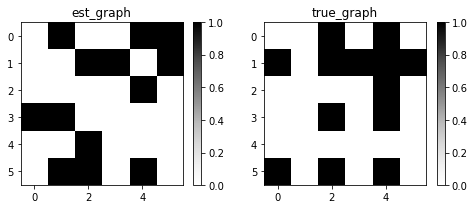

2023-03-16 20:14:58,789 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:58,792 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:58,837 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:14:58,837 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:14:58,839 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5385, 'recall': 0.5385, 'F1': 0.5385, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:58,846 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:14:59,194 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.721, max_reward: -1.023, max_reward_batch: -1.023
2023-03-16 20:14:59,195 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8827, cyc_min 13.98
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/

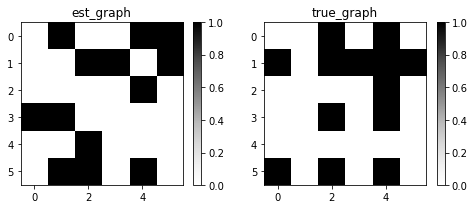

2023-03-16 20:14:59,807 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:14:59,810 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:14:59,824 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:14:59,825 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:14:59,828 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5385, 'recall': 0.5385, 'F1': 0.5385, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:14:59,837 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:00,130 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.382, max_reward: -1.252, max_reward_batch: -1.252
2023-03-16 20:15:00,131 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9127, cyc_min 33.92
100%|██████████| 3/3 [00:00<00:00,  3.80it/s]
2023-03-16 20:15:00,619 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


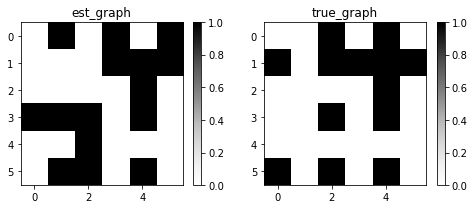

2023-03-16 20:15:00,823 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:00,826 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:00,873 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:15:00,873 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:15:00,876 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.5333, 'recall': 0.6154, 'F1': 0.5714, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:00,885 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:01,251 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.385, max_reward: -1.253, max_reward_batch: -1.253
2023-03-16 20:15:01,251 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9141, cyc_min 33.92
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/

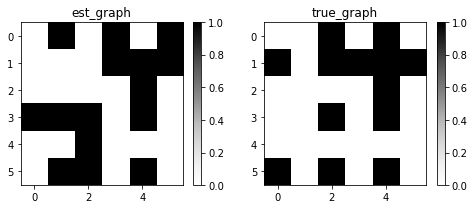

2023-03-16 20:15:01,884 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:01,887 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:01,900 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:15:01,901 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:15:01,903 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.5333, 'recall': 0.6154, 'F1': 0.5714, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:01,912 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:02,250 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.719, max_reward: -1.02, max_reward_batch: -1.02
2023-03-16 20:15:02,250 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8799, cyc_min 13.98
100%|██████████| 3/3 [00:00<00:00,  3.67it/s]
2023-03-16 20:15:02,722 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


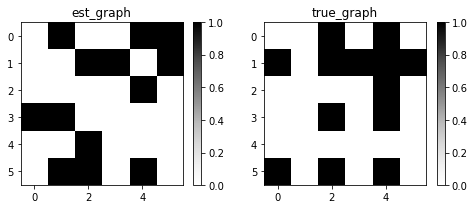

2023-03-16 20:15:02,879 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:02,882 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:02,959 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:15:02,959 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:15:02,961 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5385, 'recall': 0.5385, 'F1': 0.5385, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:02,970 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:03,299 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.721, max_reward: -1.023, max_reward_batch: -1.023
2023-03-16 20:15:03,300 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.8827, cyc_min 13.98
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/

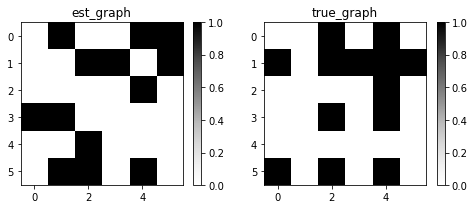

2023-03-16 20:15:03,963 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:03,966 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:03,979 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:15:03,979 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:15:03,981 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.3, 'tpr': 0.5385, 'fpr': 1.5, 'shd': 7, 'nnz': 10, 'precision': 0.5385, 'recall': 0.5385, 'F1': 0.5385, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:03,990 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:04,328 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.382, max_reward: -1.252, max_reward_batch: -1.252
2023-03-16 20:15:04,329 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9127, cyc_min 33.92
100%|██████████| 3/3 [00:00<00:00,  3.90it/s]
2023-03-16 20:15:04,752 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


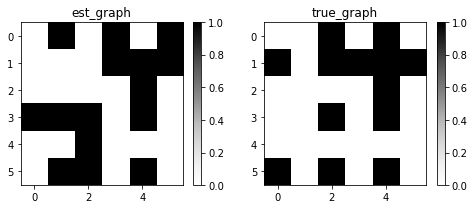

2023-03-16 20:15:04,894 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:04,897 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:04,943 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:15:04,944 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:15:04,946 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.5333, 'recall': 0.6154, 'F1': 0.5714, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'BilinearDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:04,953 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:05,257 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.385, max_reward: -1.253, max_reward_batch: -1.253
2023-03-16 20:15:05,258 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 0.9141, cyc_min 33.92
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/

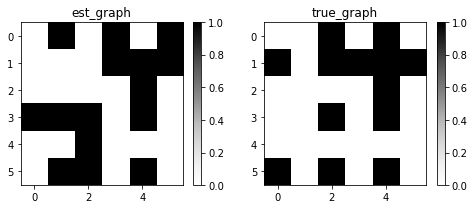

2023-03-16 20:15:05,843 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:05,845 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:05,859 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:15:05,860 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:15:05,863 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.2727, 'tpr': 0.6154, 'fpr': 1.5, 'shd': 6, 'nnz': 11, 'precision': 0.5333, 'recall': 0.6154, 'F1': 0.5714, 'gscore': 0.0769}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:05,935 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:06,228 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.085, max_reward: -1.235, max_reward_batch: -1.235
2023-03-16 20:15:06,229 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.061, cyc_min 17.48
100%|██████████| 3/3 [00:00<00:00,  3.60it/s]
2023-03-16 20:15:06,698 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


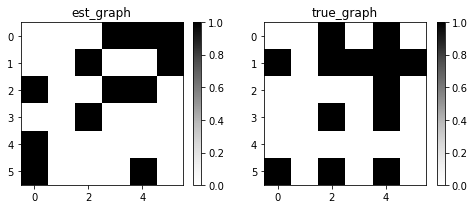

2023-03-16 20:15:06,845 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:06,848 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:06,893 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:15:06,893 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:15:06,895 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2222, 'tpr': 0.5385, 'fpr': 1.0, 'shd': 7, 'nnz': 9, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:06,903 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:07,235 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.087, max_reward: -1.237, max_reward_batch: -1.237
2023-03-16 20:15:07,236 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.063, cyc_min 17.48
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

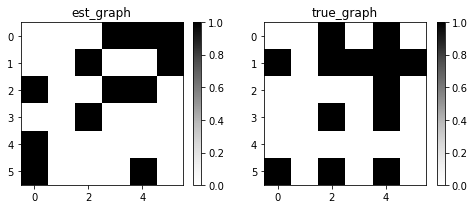

2023-03-16 20:15:07,849 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:07,852 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:07,866 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:15:07,866 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:15:07,869 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2222, 'tpr': 0.5385, 'fpr': 1.0, 'shd': 7, 'nnz': 9, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:07,881 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:08,162 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.663, max_reward: -1.636, max_reward_batch: -1.636
2023-03-16 20:15:08,162 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.39, cyc_min 24.6
100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
2023-03-16 20:15:08,631 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


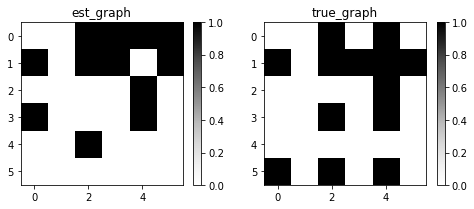

2023-03-16 20:15:08,775 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:08,777 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:08,820 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:15:08,821 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:15:08,823 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.2, 'tpr': 0.6154, 'fpr': 1.0, 'shd': 6, 'nnz': 10, 'precision': 0.6667, 'recall': 0.6154, 'F1': 0.64, 'gscore': 0.3077}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'tanh', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:08,830 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:09,137 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.666, max_reward: -1.64, max_reward_batch: -1.64
2023-03-16 20:15:09,137 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.394, cyc_min 24.6
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/opt/

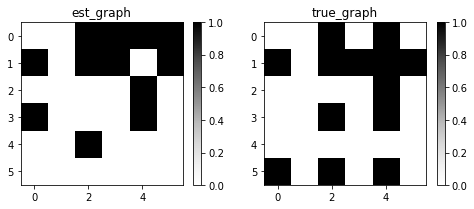

2023-03-16 20:15:09,745 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:09,747 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:09,761 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:15:09,761 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:15:09,764 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.2, 'tpr': 0.6154, 'fpr': 1.0, 'shd': 6, 'nnz': 10, 'precision': 0.6667, 'recall': 0.6154, 'F1': 0.64, 'gscore': 0.3077}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:09,773 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:10,042 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.326, max_reward: -1.235, max_reward_batch: -1.235
2023-03-16 20:15:10,043 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.061, cyc_min 17.48
100%|██████████| 3/3 [00:00<00:00,  4.22it/s]
2023-03-16 20:15:10,477 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


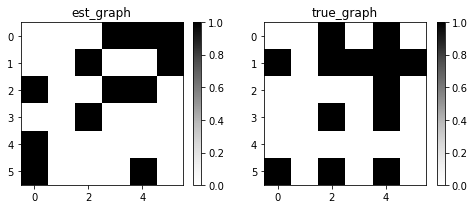

2023-03-16 20:15:10,625 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:10,628 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:10,669 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:15:10,669 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:15:10,671 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2222, 'tpr': 0.5385, 'fpr': 1.0, 'shd': 7, 'nnz': 9, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:10,678 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:10,982 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.328, max_reward: -1.237, max_reward_batch: -1.237
2023-03-16 20:15:10,983 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.063, cyc_min 17.48
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

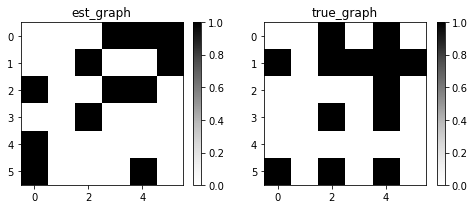

2023-03-16 20:15:11,635 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:11,637 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:11,655 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:15:11,655 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:15:11,658 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2222, 'tpr': 0.5385, 'fpr': 1.0, 'shd': 7, 'nnz': 9, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:11,666 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:11,975 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.884, max_reward: -1.705, max_reward_batch: -1.705
2023-03-16 20:15:11,976 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.53, cyc_min 17.48
100%|██████████| 3/3 [00:00<00:00,  3.99it/s]
2023-03-16 20:15:12,413 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


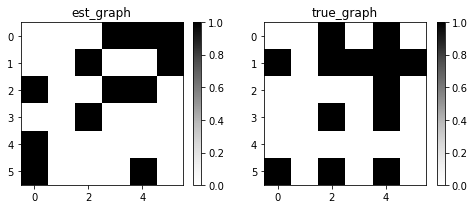

2023-03-16 20:15:12,557 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:12,560 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:12,602 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:15:12,602 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:15:12,604 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.2222, 'tpr': 0.5385, 'fpr': 1.0, 'shd': 7, 'nnz': 9, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'relu', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:12,611 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:12,919 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.886, max_reward: -1.708, max_reward_batch: -1.708
2023-03-16 20:15:12,919 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.533, cyc_min 17.48
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

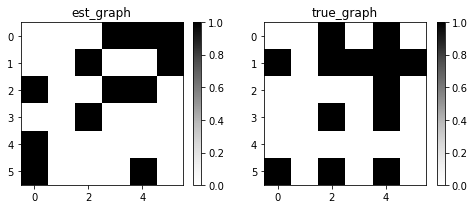

2023-03-16 20:15:13,531 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:13,533 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:13,546 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6143800281041525, su: 4.5328830878402915, strue: -9.385619971895848
2023-03-16 20:15:13,547 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6143800281041525, su: 4.5328830878402915, lambda2: 0.01, true: -12.759974724472173
2023-03-16 20:15:13,550 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-0

{'fdr': 0.2222, 'tpr': 0.5385, 'fpr': 1.0, 'shd': 7, 'nnz': 9, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:13,558 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:13,857 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.111, max_reward: -1.235, max_reward_batch: -1.235
2023-03-16 20:15:13,857 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.061, cyc_min 17.48
100%|██████████| 3/3 [00:00<00:00,  4.01it/s]
2023-03-16 20:15:14,300 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


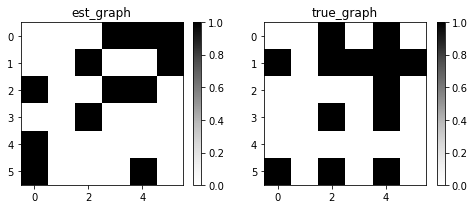

2023-03-16 20:15:14,444 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:14,446 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:14,487 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: 0.6075354231692734, su: 4.5328830878402915, strue: -9.392464576830726
2023-03-16 20:15:14,488 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: 0.6075354231692734, su: 4.5328830878402915, lambda2: 0.01, true: -12.73772523387186
2023-03-16 20:15:14,490 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2222, 'tpr': 0.5385, 'fpr': 1.0, 'shd': 7, 'nnz': 9, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'none', 'score_type': 'BIC', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:14,496 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:14,807 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -3.114, max_reward: -1.237, max_reward_batch: -1.237
2023-03-16 20:15:14,807 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.063, cyc_min 17.48
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/o

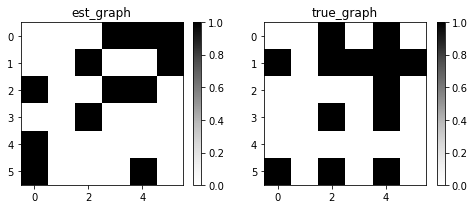

2023-03-16 20:15:15,403 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:15,405 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:15,418 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.836089176630015, su: 9.573406970343527, strue: -18.836089176630015
2023-03-16 20:15:15,419 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.836089176630015, su: 9.573406970343527, lambda2: 0.01, true: -2.7159895958488702
2023-03-16 20:15:15,422 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03

{'fdr': 0.2222, 'tpr': 0.5385, 'fpr': 1.0, 'shd': 7, 'nnz': 9, 'precision': 0.5833, 'recall': 0.5385, 'F1': 0.56, 'gscore': 0.1538}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'LR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:15,430 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:15,755 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.688, max_reward: -1.636, max_reward_batch: -1.636
2023-03-16 20:15:15,755 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.39, cyc_min 24.6
100%|██████████| 3/3 [00:00<00:00,  3.89it/s]
2023-03-16 20:15:16,195 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:454] - INFO: Training COMPLETED !


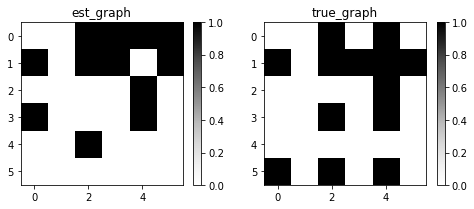

2023-03-16 20:15:16,340 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:224] - INFO: GPU is unavailable.
2023-03-16 20:15:16,342 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:264] - INFO: Python version is 3.9.7
2023-03-16 20:15:16,400 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:289] - INFO: Original sl: -8.874480270571041, su: 9.573406970343527, strue: -18.87448027057104
2023-03-16 20:15:16,400 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:290] - INFO: Transfomed sl: -8.874480270571041, su: 9.573406970343527, lambda2: 0.01, true: -2.7103374682986847
2023-03-16 20:15:16,406 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:334] - INFO: Finished creating training dataset and reward class
2023-03-

{'fdr': 0.2, 'tpr': 0.6154, 'fpr': 1.0, 'shd': 6, 'nnz': 10, 'precision': 0.6667, 'recall': 0.6154, 'F1': 0.64, 'gscore': 0.3077}

{'encoder_type': 'GATEncoder', 'decoder_type': 'NTNDecoder', 'decoder_activation': 'none', 'score_type': 'BIC_different_var', 'reg_type': 'QR', 'device_type': 'cpu'}


  0%|          | 0/3 [00:00<?, ?it/s]2023-03-16 20:15:16,474 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:362] - INFO: Shape of actor.input: torch.Size([64, 6, 64])
2023-03-16 20:15:16,786 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:415] - INFO: [iter 1] reward_batch: -2.69, max_reward: -1.64, max_reward_batch: -1.64
2023-03-16 20:15:16,787 - /Users/momo/Desktop/CoDiet/code/gCastle/gcastle/tests/../castle/algorithms/gradient/rl/torch/rl.py[line:428] - INFO: [iter 1] lambda1 1.0, upper 5.0, lambda2 0.01, upper 0.01, score_min 1.394, cyc_min 24.6
/Users/momo/opt/anaconda3/envs/study/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/momo/opt/a

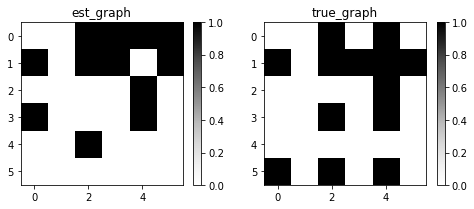

{'fdr': 0.2, 'tpr': 0.6154, 'fpr': 1.0, 'shd': 6, 'nnz': 10, 'precision': 0.6667, 'recall': 0.6154, 'F1': 0.64, 'gscore': 0.3077}


In [20]:
params = add_params(consts.RL_VALID_PARAMS)
for d in combined_params(params):
    print(f"\n{'=' * 100}")
    print(d)
    print(f"{'=' * 100}")
    try:
        rl = RL(**d, nb_epoch=3)
        rl.learn(data=x)

        GraphDAG(rl.causal_matrix, true_dag)

        # calculate accuracy
        mm = MetricsDAG(rl.causal_matrix, true_dag)
        print(mm.metrics)
        results.append(mm)
    except Exception:
        error_params.append(d)
        print(traceback.format_exc())